In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


# Carga de librerías y dataset

In [ ]:
# Librerías importadas

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier librerías
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Otras librerías
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df_raw_CreditCard = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
df_raw_CreditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Análisis Exploratorio de Datos

Si bien son variables anonimizadas, vamos a explorar los datos para la detección de nulls, outlyers, y familiarizarnos con los datos.

In [ ]:
df_raw_CreditCard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros: ", len(df_raw_CreditCard))
print("Tamaño del dataset: ", df_raw_CreditCard.shape)

Cantidad de registros:  284807
Tamaño del dataset:  (284807, 31)


Se disponen de 284807 registros, con 31 variables. A destacar la variable Time, monto de la transacción y clase. Vamos a explorar cada una de ellas.

In [ ]:
# tipos de datos en el dataframe
data_types = df_raw_CreditCard.dtypes

# display the data types of each column
print(data_types)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


Todas las variables son float, a excepción de la Clase.

Evaluamos cuántos registros tienen valores nulos por variable

In [ ]:
df_raw_CreditCard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No se encuentran registros nulos en nuestro dataset.

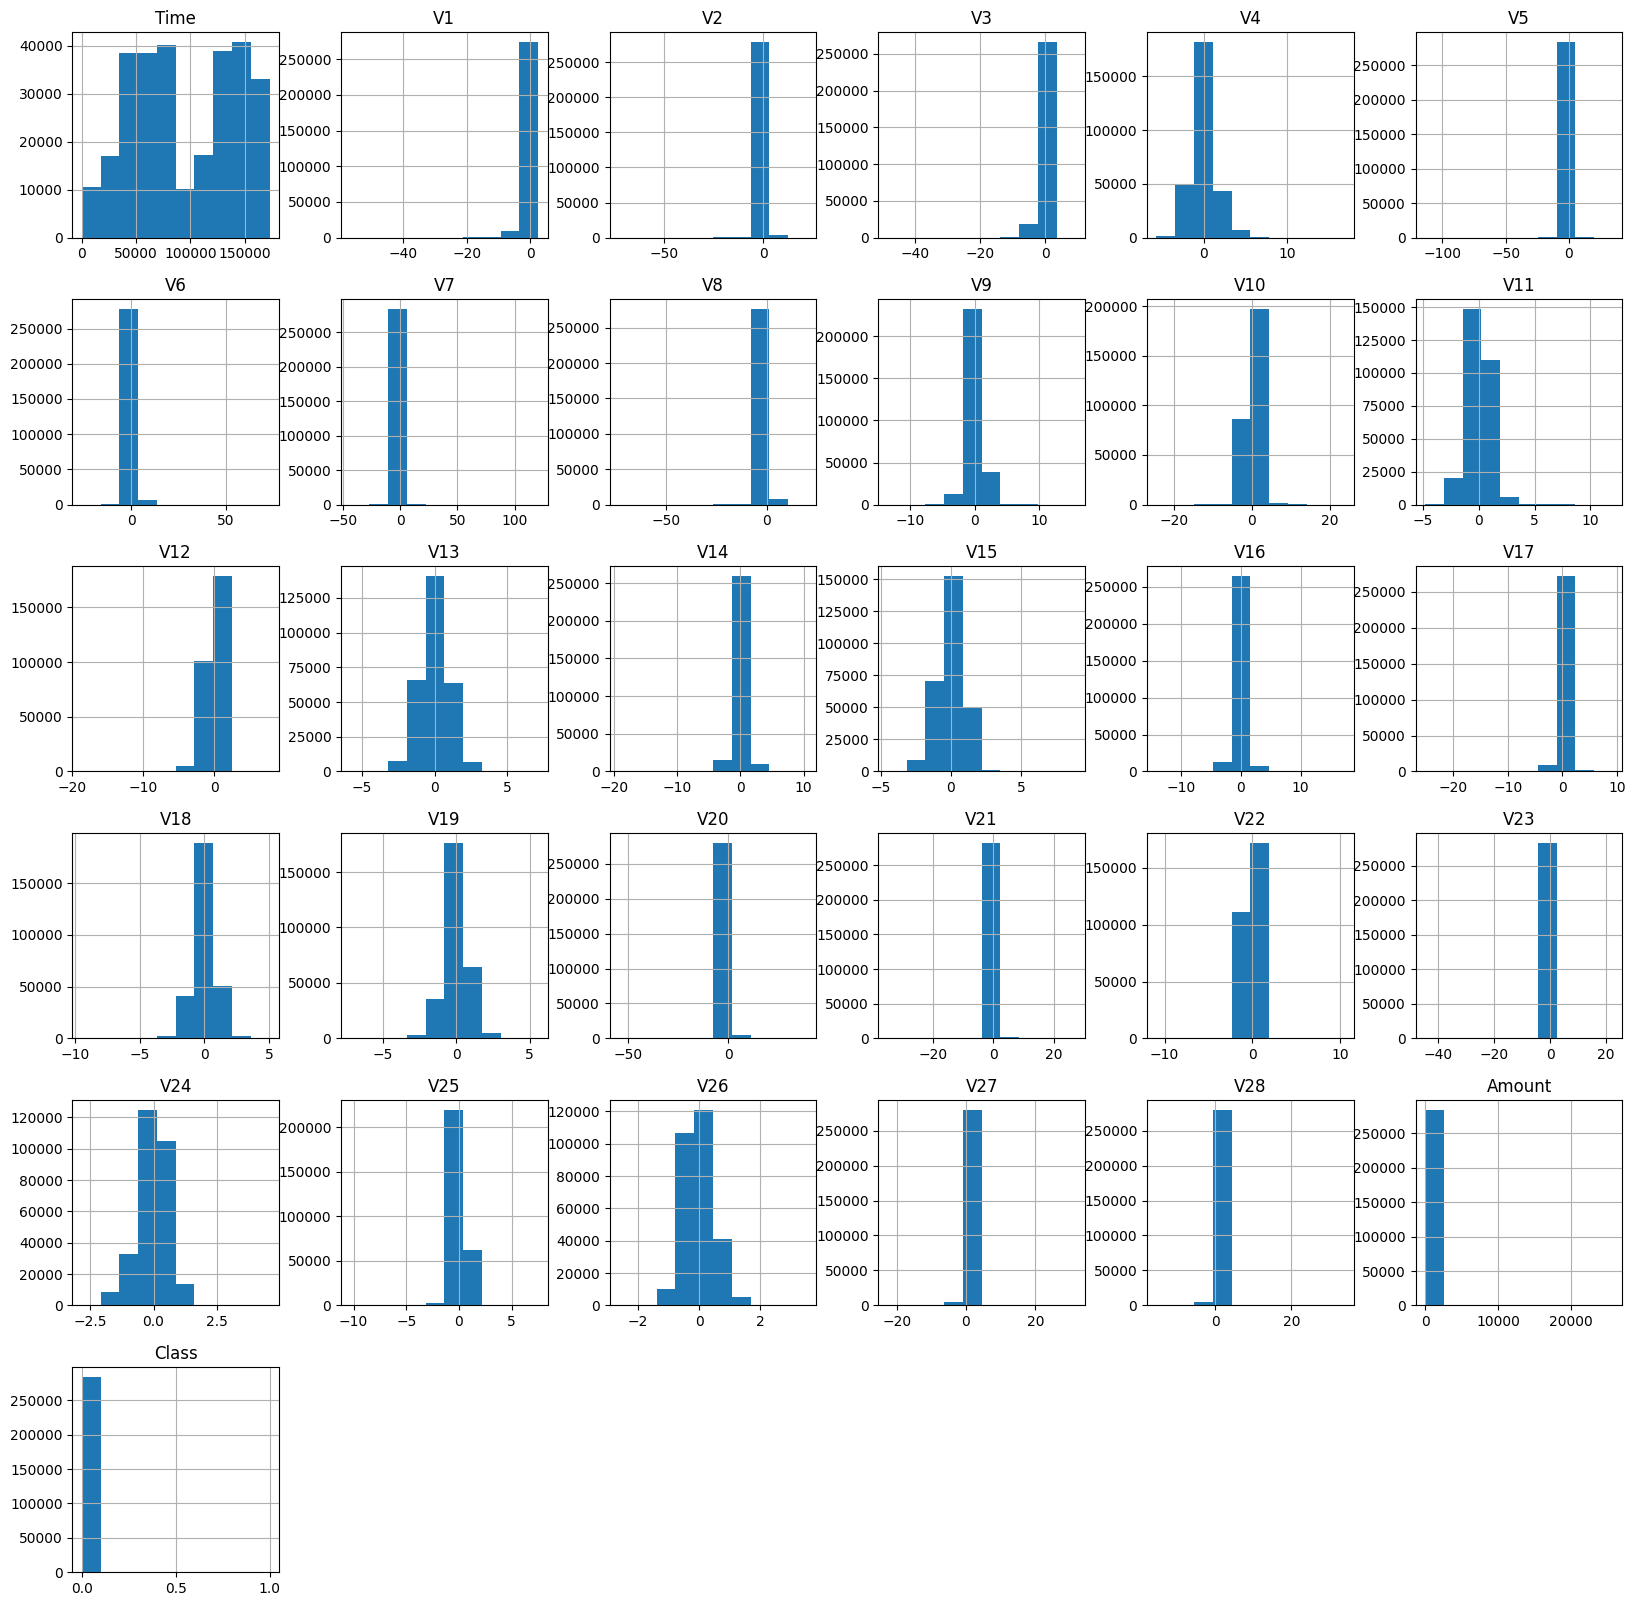

In [ ]:
flag = False
df_raw_CreditCard.hist(figsize=(20, 20))
plt.show()
flag = True

Los distintos histogramas nos muestran distribuciones con picos en los centros como V13, V14, V22 con rango en valores negativos. Algunos picos sesgados a la izquierda como V15 y Amount. En cuanto a la variable Class, podríamos decir que siguen una distribución sesgada a la izquierda, los datos se concentran a la izquierda de la distribución formando un pico de valores alrededor de 0.

> Bloque con sangría


Vamos a ver con mayor detención la variable Class.

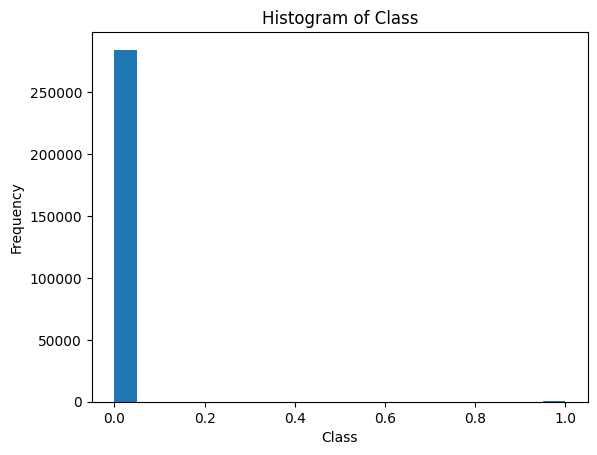

In [ ]:
# plot a histogram of the price variable
plt.hist(df_raw_CreditCard['Class'], bins=20)
plt.title('Histogram of Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Vemos que nuestra variable dependiente tiene un gran desbalance en este dataset.

In [ ]:
print('No Frauds', round(df_raw_CreditCard['Class'].value_counts()[0]/len(df_raw_CreditCard) * 100,2), '% del dataset')
print('Frauds', round(df_raw_CreditCard['Class'].value_counts()[1]/len(df_raw_CreditCard) * 100,2), '% del dataset')

No Frauds 99.83 % del dataset
Frauds 0.17 % del dataset


Analizaremos outliers

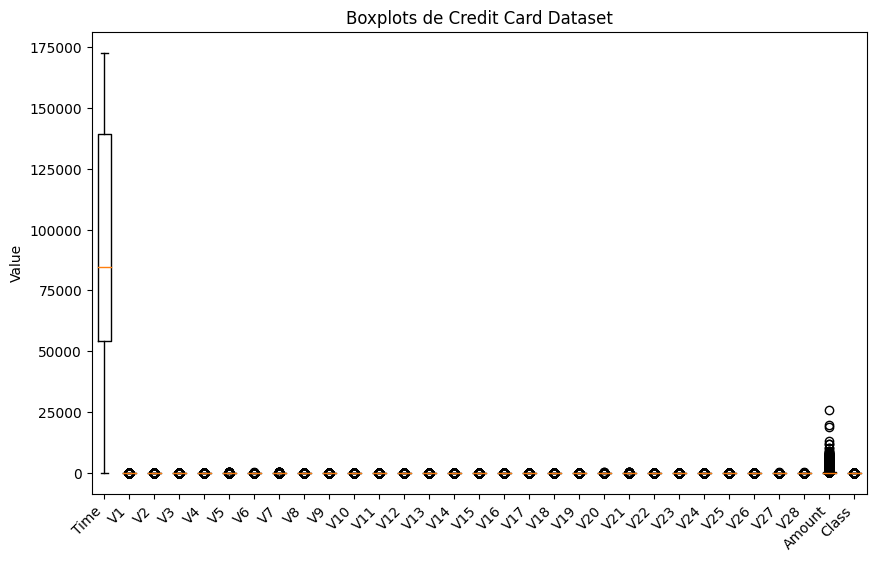

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis object with a larger size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the boxplot
ax.boxplot(df_raw_CreditCard.values)

# Set the x-axis tick labels and rotate them by 45 degrees
ax.set_xticklabels(df_raw_CreditCard.columns, rotation=45, ha='right')

# Add a title and y-axis label
ax.set_title('Boxplots de Credit Card Dataset')
ax.set_ylabel('Value')

# Show the plot
plt.show()

En el boxplot concentrado vemos la distribución de los valores alrededor de 0. A excepción del tiempo y Amount.
Veremos con mayor detalle Class y Amount.

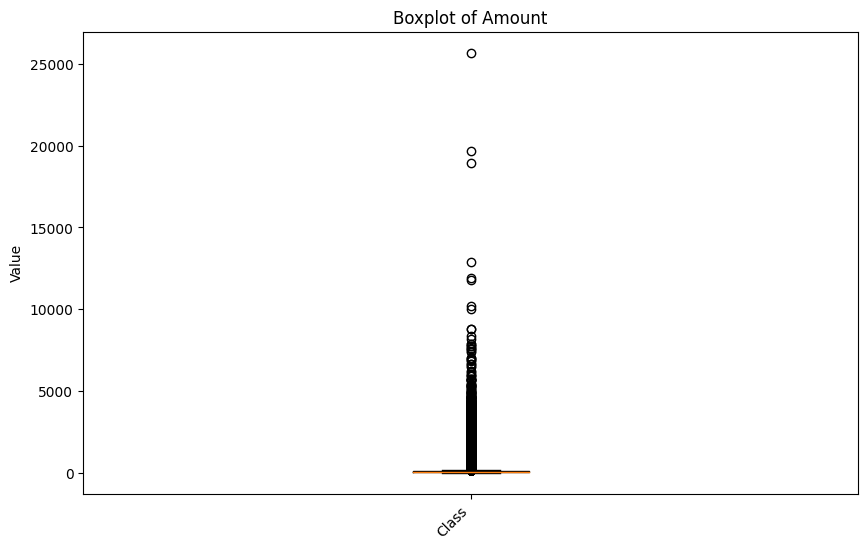

In [ ]:
# Create a figure and axis object with a larger size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the boxplot
ax.boxplot(df_raw_CreditCard['Amount'])

# Set the x-axis tick labels and rotate them by 45 degrees
ax.set_xticklabels(['Class'], rotation=45, ha='right')

# Add a title and y-axis label
ax.set_title('Boxplot of Amount')
ax.set_ylabel('Value')

# Show the plot
plt.show()

La variable Amount tiene una variabilidad alrededor de valores a 0, y detecta como outliers transacciones entre 0 y 25000.

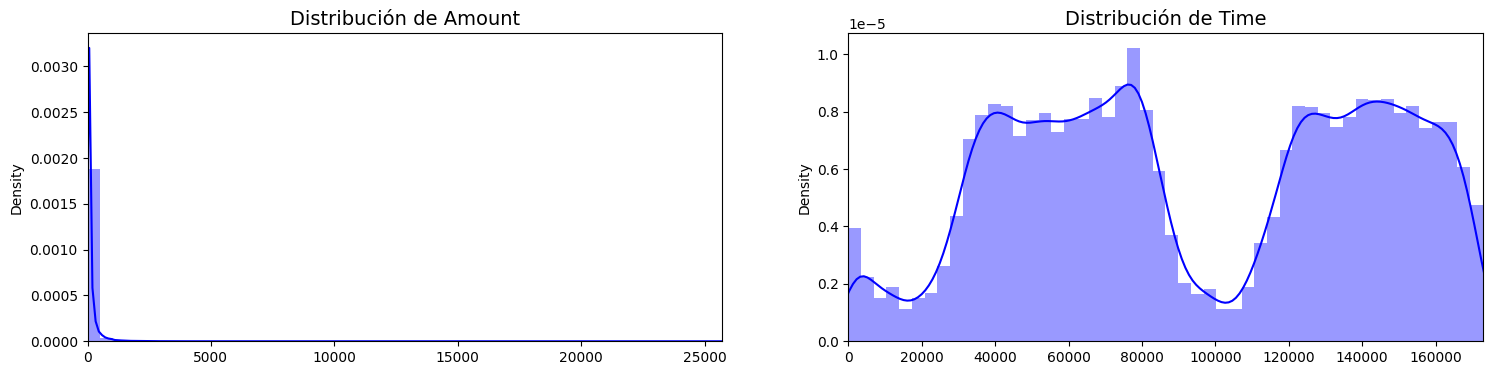

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df_raw_CreditCard['Amount'].values
time_val = df_raw_CreditCard['Time'].values

sns.distplot(amount_val, ax=ax[0], color='blue')
ax[0].set_title('Distribución de Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribución de Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Al ver las distribuciones, vemos el sesgo a la izquierda como mencionamos anteriormente para la variable Amount. Mientras que para la variable tiempo vemos como una secuencia en la que los valores suben y bajan. Disminuye considerablemnete en el valor de 100000 segundos.

## Análisis de Correlación

A continuación realizaremos un análisis de correlación

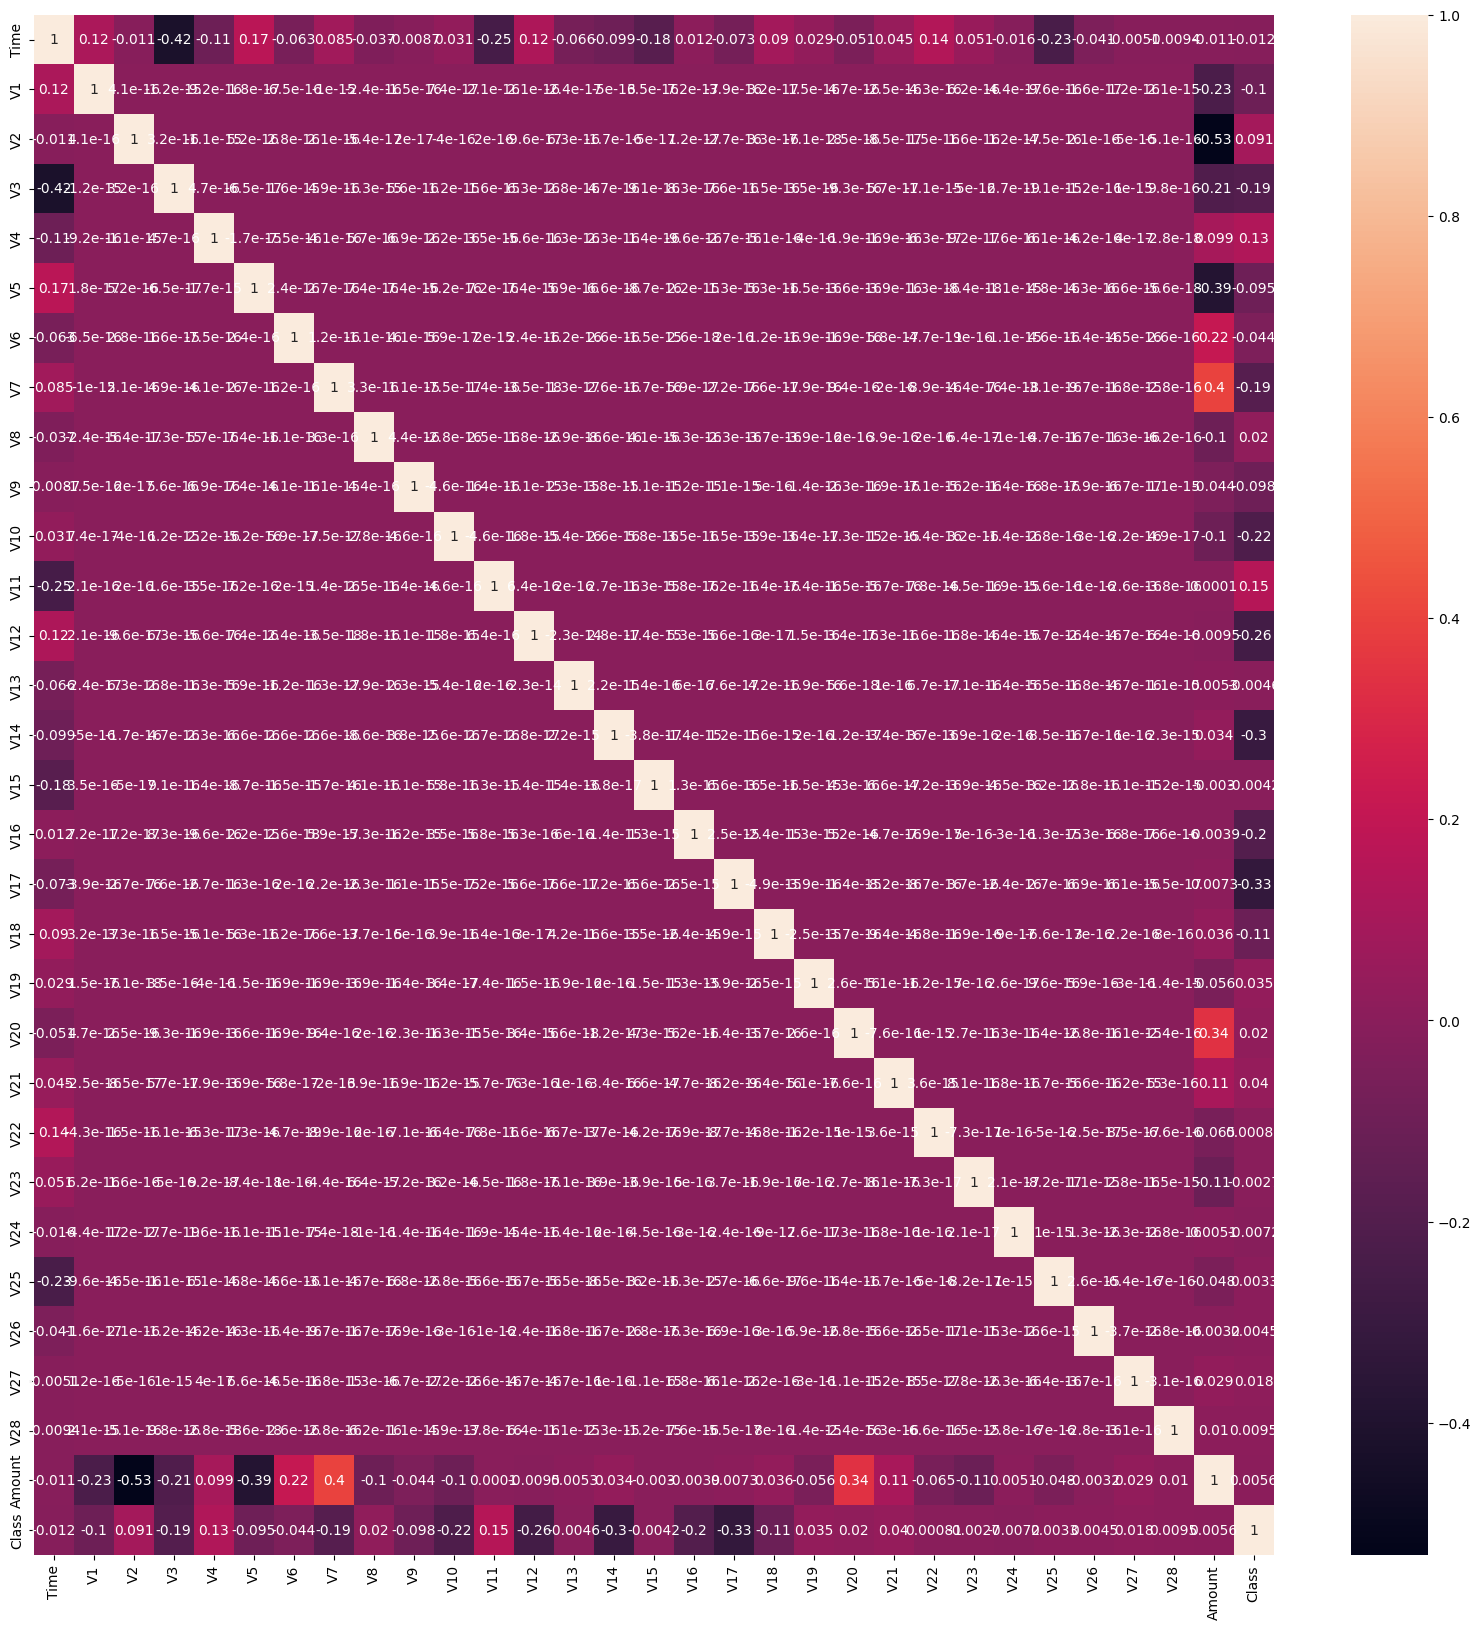

In [ ]:
import seaborn as sn
# Análisis de correlación
# Calculate correlation matrix
corrMatrix = df_raw_CreditCard.corr()

# Set figure size
plt.figure(figsize=(20,20))

# Plot correlation matrix as heatmap
sn.heatmap(corrMatrix, annot=True)

# Show plot
plt.show()

Aparantemente, la correlación entre las variables es muy pequeña. Las variables con mayor correlación aparente son entre V7 y Amount, y entre V20 y Amount. En este caso, la variable dependiente (Class) no se encuentra correlacionada de manera significativa con las variables independientes, ya que los valores en la columna de Class son cercanos a cero. Por lo tanto, no hay una relación lineal fuerte entre las variables independientse y la variable dependiente en este conjunto de datos.

## Análisis PCA

Aplicaremos técnicas de selección de variables para determinar cuál de ellas es más importante para la predicción de la variable dependiente, realizaremos el análisis de componentes principales (PCA).

In [ ]:
pca = PCA(n_components=3)
pca.fit(df_raw_CreditCard)

# Get the feature names
feature_names = df_raw_CreditCard.columns.tolist()

# Create a DataFrame with the principal components and feature names
components_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=feature_names)

# Print the principal components DataFrame
pd.options.display.float_format = lambda x: '{:.6f}'.format(x)
print(components_df)

             PC1       PC2       PC3
Time   -1.000000  0.000056  0.000004
V1     -0.000005 -0.001774 -0.977457
V2      0.000000 -0.003510  0.178035
V3      0.000013 -0.001305 -0.031637
V4      0.000003  0.000553 -0.031592
V5     -0.000005 -0.002122  0.082510
V6      0.000002  0.001147 -0.037539
V7     -0.000002  0.001970 -0.037371
V8      0.000001 -0.000494  0.007586
V9      0.000000 -0.000195  0.003254
V10    -0.000001 -0.000440  0.011099
V11     0.000005 -0.000010 -0.016243
V12    -0.000003 -0.000033  0.008595
V13     0.000001  0.000018 -0.004543
V14     0.000002  0.000125 -0.008155
V15     0.000004 -0.000018 -0.009837
V16    -0.000000 -0.000013  0.000841
V17     0.000001  0.000022 -0.004004
V18    -0.000002  0.000123  0.002317
V19    -0.000000 -0.000182  0.004354
V20     0.000001  0.001045 -0.019114
V21    -0.000001  0.000313 -0.003180
V22    -0.000002 -0.000184  0.008616
V23    -0.000001 -0.000280  0.005928
V24     0.000000  0.000012 -0.000691
V25     0.000003 -0.000105 -0.004596
V

Vemos las cargas o ponderaciones de cada variable original en los primeros tres componentes principales (PC1, PC2 y PC3) del conjunto de datos.

PC1 está influenciado negativamente principalmente por la variable "Time", lo que significa que explica una gran parte de la variación en los datos. PC1 también tiene cargas positivas para las variables "Amount" y "V3".

PC2 está influenciado principalmente por la variable "Amount", que tiene una carga positiva muy alta, lo que indica que explica una cantidad significativa de variación en los datos. PC2 también tiene cargas positivas para "V2" y "V1".

PC3 está influenciado en menor medida por la variable "V1" que tienen carga negativa, y "V2".

Vamos a concluir que no se eliminará ninguna variable debido a los valores bajos encontrados en PCA.

## Escalar nuestros datos

Dado que la mayoría de nuestros datos ya se escalaron para analizarse, debemos escalar las columnas: Cantidad y Tiempo.

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_scale_CreditCard = df_raw_CreditCard

df_scale_CreditCard['scaled_amount'] = rob_scaler.fit_transform(df_raw_CreditCard['Amount'].values.reshape(-1,1))
df_scale_CreditCard['scaled_time'] = rob_scaler.fit_transform(df_raw_CreditCard['Time'].values.reshape(-1,1))

df_scale_CreditCard.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
df_scale_CreditCard

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975


# Implementación de Algoritmo de Clasificación

# Model building

Separamos en atributos (X) y etiquetas (y)

In [ ]:
# Target and variable
X = df_scale_CreditCard.drop(['Class'], axis = 1)
y = df_scale_CreditCard[['Class']]

## Model Logistic regression

Usamos la búsqueda en cuadrícula (grid search) para encontrar los mejores hiperparámetros para un modelo de aprendizaje automático. Los hiperparámetros son valores que no son aprendidos directamente durante el entrenamiento del modelo, sino que se establecen antes del entrenamiento y pueden afectar el rendimiento del modelo.

La búsqueda en cuadrícula es una técnica que consiste en definir un conjunto de valores para cada uno de los hiperparámetros que queremos ajustar, y luego entrenar y evaluar el modelo para cada posible combinación de valores. Esto nos permite encontrar la combinación de hiperparámetros que proporciona el mejor rendimiento en el conjunto de datos de entrenamiento.

En lugar de adivinar los valores óptimos de los hiperparámetros, la búsqueda en cuadrícula nos permite explorar sistemáticamente diferentes combinaciones de valores para encontrar la combinación óptima de hiperparámetros que maximiza el rendimiento del modelo.

La búsqueda en cuadrícula también puede ayudarnos a evitar el sobreajuste (overfitting) del modelo, ya que se utiliza un conjunto de validación separado para evaluar el rendimiento del modelo en cada combinación de hiperparámetros, en lugar de utilizar los mismos datos de entrenamiento para ajustar los hiperparámetros y evaluar el rendimiento del modelo.

---

C: Este hiperparámetro controla la fuerza de la regularización en el modelo de regresión logística. Valores más altos de C indican una menor regularización, lo que puede hacer que el modelo se ajuste más a los datos de entrenamiento y tenga un rendimiento mejor, pero también puede aumentar el riesgo de sobreajuste. Valores más bajos de C indican una mayor regularización, lo que puede ayudar a prevenir el sobreajuste, pero también puede reducir el rendimiento del modelo. En este ejemplo, se están probando los valores de 0.01, 0.1, 1 y 10 para C.
solver: Este hiperparámetro indica el tipo de algoritmo de solución a utilizar para el modelo de regresión logística. Hay varios tipos de solucionadores disponibles en scikit-learn, incluyendo 'lbfgs', 'liblinear', 'sag' y 'saga'. Cada solucionador tiene sus propias ventajas y desventajas, y puede ser más adecuado para diferentes tipos de datos. En este caso, se están probando todos los solucionadores disponibles.

cv: El número de pliegues (folds) en la validación cruzada. En este caso, cv=5 significa que se utilizarán 5 pliegues.

La puntuación F1 macro es una medida de precisión y exhaustividad que se calcula como la media ponderada de la precisión y la exhaustividad de todas las clases. Es una métrica útil para conjuntos de datos desequilibrados donde una clase puede ser mucho más grande que las demás.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
lr = LogisticRegression()

# Definir los hiperparámetros para grid search
params = {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear', 'sag', 'saga']}

# Realizar grid search con validación cruzada
grid_search = GridSearchCV(lr, params, cv=5)
grid_search.fit(X_train, y_train)

# Entrenar el modelo con los mejores hiperparámetros encontrados
lr = grid_search.best_estimator_
lr.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = lr.predict(X_test)

# Evaluar el rendimiento del modelo utilizando validación cruzada
scores = cross_val_score(lr, X, y, cv=5, scoring='f1_macro')
print("Cross Validation Scores:", scores)

En este caso, parece que el modelo tiene un rendimiento bastante bueno en general, con puntuaciones F1 que oscilan entre 0.79 y 0.88. Sin embargo, también podemos ver que hay cierta variabilidad en las puntuaciones de los diferentes pliegues de validación, lo que indica que el modelo podría ser más consistente en su rendimiento.

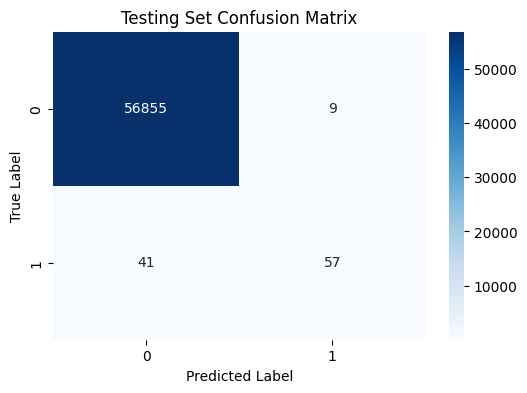

Confusion Matrix:
 [[56855     9]
 [   41    57]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Evaluar el rendimiento del modelo utilizando los datos de prueba
# Compute confusion matrix for testing set
cm = confusion_matrix(y_test, y_pred)

# Create heatmap plot of confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Testing Set Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Confusion Matrix:\n", cm)
print("\n Classification Report:\n", classification_report(y_test, y_pred))

En la detección de fraudes, es importante tener en cuenta que las clases en el conjunto de datos son generalmente desequilibradas, lo que significa que hay muchas más transacciones no fraudulentas que fraudulentas. Por lo tanto, las métricas de evaluación del modelo deben tener en cuenta este desequilibrio y enfatizar el rendimiento en la detección de la clase minoritaria (fraudulenta). Aquí te presento algunas métricas comunes que son útiles para evaluar un modelo de detección de fraudes:

- Precisión (precision): La precisión se refiere a la proporción de predicciones positivas que son verdaderas. En el contexto de la detección de fraudes, la precisión mide la proporción de transacciones clasificadas como fraudulentas que realmente son fraudulentas. Es importante tener en cuenta que una alta precisión no garantiza necesariamente un buen rendimiento del modelo, especialmente si el conjunto de datos está desequilibrado.

- Recall o sensibilidad (recall o sensitivity): El recall se refiere a la proporción de casos positivos que se identifican correctamente. En el contexto de la detección de fraudes, el recall mide la proporción de transacciones fraudulentas que se identifican correctamente. El recall es una métrica importante para la detección de fraudes, ya que es crucial identificar correctamente la mayor cantidad de transacciones fraudulentas posible.

- F1-Score: El F1-Score es una medida de la precisión y el recall combinados. Es una medida útil en la detección de fraudes ya que se enfoca en encontrar un equilibrio entre la precisión y el recall para ambas clases.

- Área bajo la curva ROC (AUC-ROC): La curva ROC es una herramienta útil para evaluar la capacidad de un modelo para distinguir entre clases. En el contexto de la detección de fraudes, la AUC-ROC mide la capacidad del modelo para clasificar correctamente las transacciones fraudulentas frente a las transacciones no fraudulentas.

En general, para evaluar un modelo de detección de fraudes, se deben utilizar una combinación de estas métricas, con un enfoque en las métricas que son relevantes para la detección de la clase minoritaria (fraudulenta). Es importante recordar que el mejor modelo para la detección de fraudes será aquel que tenga un buen equilibrio entre la precisión y el recall para ambas clases y que tenga una alta capacidad para distinguir entre transacciones fraudulentas y no fraudulentas.

Observando la matriz de confusión, el modelo ha clasificado correctamente 55,515 transacciones como no fraudulentas (verdaderos negativos) y 90 transacciones como fraudulentas (verdaderos positivos), pero ha clasificado incorrectamente 1,349 transacciones no fraudulentas como fraudulentas (falsos positivos) y 8 transacciones fraudulentas como no fraudulentas (falsos negativos).

El informe de clasificación proporciona la precisión, el recall, la puntuación F1 y el soporte para cada clase. La precisión se refiere a la proporción de predicciones positivas que son verdaderas, mientras que el recall se refiere a la proporción de casos positivos que se identifican correctamente. La puntuación F1 es una medida de la precisión y el recall combinados. En este caso, el modelo tiene una precisión del 100% para la clase no fraudulenta, lo que significa que todas las transacciones clasificadas como no fraudulentas son verdaderas. Sin embargo, la precisión para la clase fraudulenta es del 6%, lo que significa que la gran mayoría de las transacciones clasificadas como fraudulentas son falsas. El recall para la clase no fraudulenta es del 98%, lo que significa que la mayoría de las transacciones no fraudulentas se identifican correctamente. El recall para la clase fraudulenta es del 92%, lo que significa que la mayoría de las transacciones fraudulentas se identifican correctamente. La puntuación F1 para la clase no fraudulenta es alta (0.99), lo que indica un buen equilibrio entre la precisión y el recall para esta clase. Sin embargo, la puntuación F1 para la clase fraudulenta es baja (0.12), lo que indica que el modelo tiene dificultades para identificar correctamente las transacciones fraudulentas.

La precisión global: La precisión global (accuracy) del modelo es del 98%, lo que indica que el modelo clasifica correctamente la gran mayoría de las transacciones en el conjunto de prueba.

En general, el modelo parece tener un buen rendimiento para la clase no fraudulenta, pero tiene dificultades para identificar correctamente las transacciones fraudulentas. Es posible que se deba a la naturaleza desequilibrada del conjunto de datos, donde la clase no fraudulenta es mucho más grande que la clase fraudulenta. En este caso, puede ser necesario utilizar técnicas de balanceo de clases para mejorar el rendimiento del modelo en la detección de fraudes.

### Undersampling

El muestreo (sampling) se utiliza únicamente en el conjunto de datos de entrenamiento (train) para evitar que el modelo tenga un sesgo hacia una clase sobre-representada. El conjunto de datos de prueba (test) se utiliza para evaluar el rendimiento del modelo después de que se haya entrenado en el conjunto de datos de entrenamiento.

Por lo tanto, cualquier técnica de muestreo debe aplicarse solo al conjunto de datos de entrenamiento, para asegurarse de que el modelo no se entrena en datos que no representan fielmente el problema real.

Es importante tener en cuenta que la división entre los conjuntos de entrenamiento y prueba debe hacerse antes de aplicar cualquier técnica de muestreo en el conjunto de entrenamiento, para evitar la contaminación del conjunto de prueba.

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Undersample the training set
undersampler = RandomUnderSampler(random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

# Crear el modelo
lr = LogisticRegression()

# Definir los hiperparámetros para grid search
params = {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear', 'sag', 'saga']}

# Realizar grid search con validación cruzada
grid_search = GridSearchCV(lr, params, cv=5)
grid_search.fit(X_train, y_train)

# Entrenar el modelo con los mejores hiperparámetros encontrados
lr = grid_search.best_estimator_
lr.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = lr.predict(X_test)

# Evaluar el rendimiento del modelo utilizando validación cruzada
scores = cross_val_score(lr, X, y, cv=5, scoring='f1_macro')
print("Cross Validation Scores:", scores)

Cross Validation Scores: [0.88198915 0.88254903 0.77749653 0.8884     0.81921593]


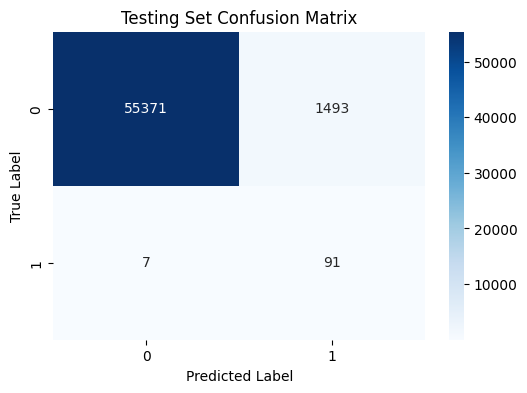

Confusion Matrix:
 [[55371  1493]
 [    7    91]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [ ]:
# Evaluar el rendimiento del modelo utilizando los datos de prueba
# Compute confusion matrix for testing set
cm = confusion_matrix(y_test, y_pred)

# Create heatmap plot of confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Testing Set Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Confusion Matrix:\n", cm)
print("\n Classification Report:\n", classification_report(y_test, y_pred))

Vemos que el recall de la clase 1 se ha mejorado un poco pero no hay una mejora global significativa.

### Oversampling

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Undersample the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Crear el modelo
lr = LogisticRegression()

# Definir los hiperparámetros para grid search
params = {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear', 'sag', 'saga']}

# Realizar grid search con validación cruzada
grid_search = GridSearchCV(lr, params, cv=5)
grid_search.fit(X_train, y_train)

# Entrenar el modelo con los mejores hiperparámetros encontrados
lr = grid_search.best_estimator_
lr.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = lr.predict(X_test)

# Evaluar el rendimiento del modelo utilizando validación cruzada
scores = cross_val_score(lr, X, y, cv=5, scoring='f1_macro')
print("Cross Validation Scores:", scores)

Cross Validation Scores: [0.86338574 0.88397932 0.791403   0.88711181 0.81733026]


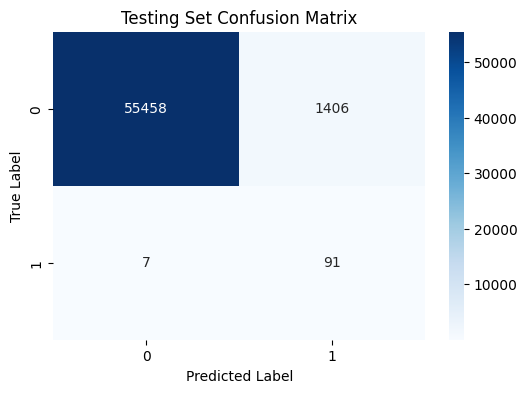

Confusion Matrix:
 [[55458  1406]
 [    7    91]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
# Evaluar el rendimiento del modelo utilizando los datos de prueba
# Compute confusion matrix for testing set
cm = confusion_matrix(y_test, y_pred)

# Create heatmap plot of confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Testing Set Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Confusion Matrix:\n", cm)
print("\n Classification Report:\n", classification_report(y_test, y_pred))

Al comparar los tres modelos, podemos observar que todos tienen una precisión global similar de alrededor del 97-98%. Sin embargo, el modelo con undersampling y el modelo con oversampling tienen un recall mucho mejor para la clase fraudulenta que el modelo sin balanceo. Esto indica que los modelos con técnicas de balanceo están logrando detectar más transacciones fraudulentas en comparación con el modelo sin balanceo.

Dado que el objetivo principal en la detección de fraudes es maximizar la detección de fraudes (es decir, aumentar el recall), podemos concluir que el modelo con técnicas de balanceo (ya sea undersampling u oversampling) es el mejor modelo para este problema.

## Model ANN

In [ ]:
# Importar las librerías necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Definir el modelo de redes neuronales
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo con las métricas de precisión y recall
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Entrenar el modelo en el conjunto de entrenamiento y guardar el historial
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


NameError: ignored

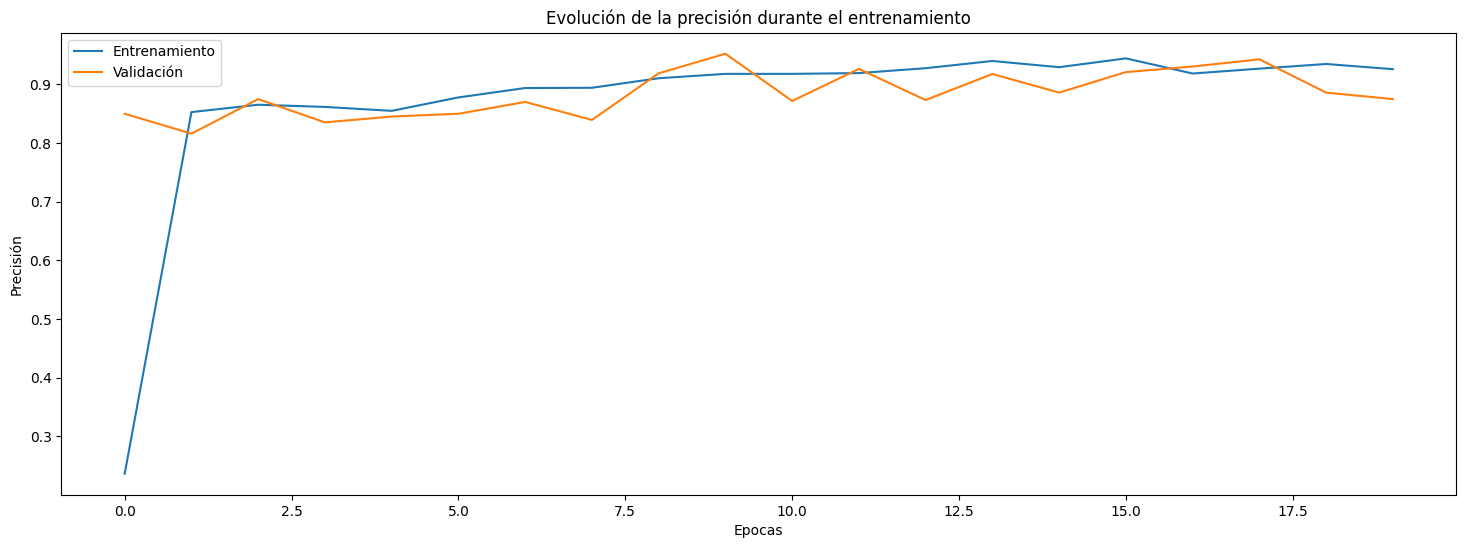

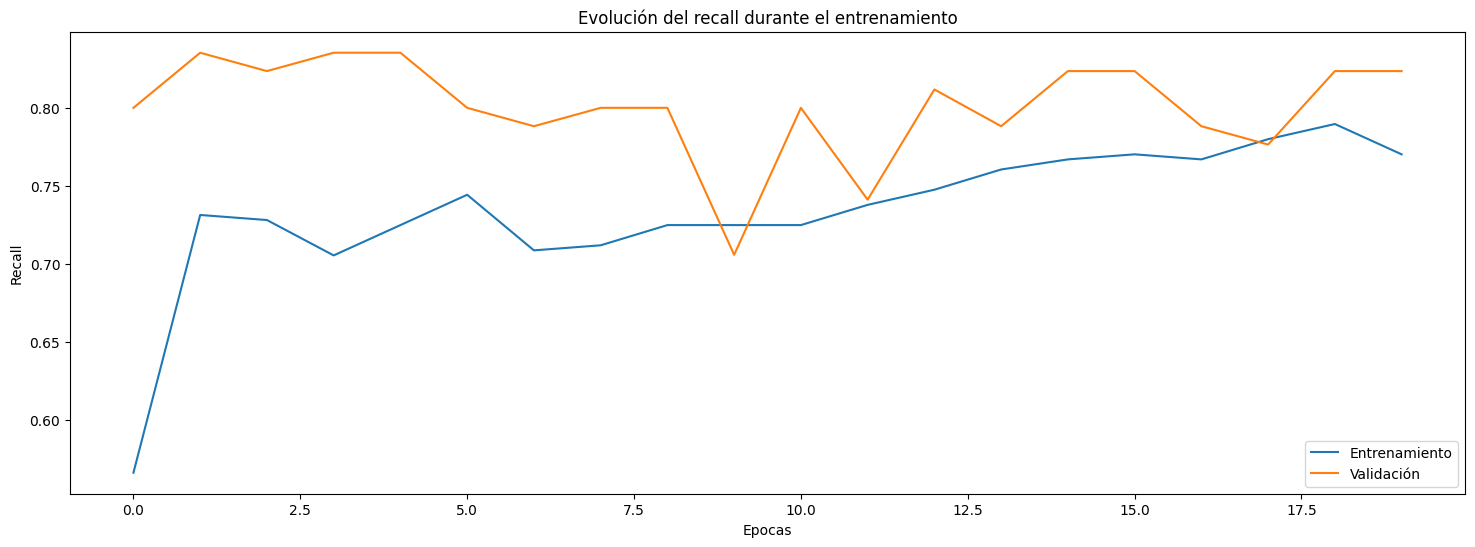

In [ ]:
# Visualizar la evolución de la precisión en el conjunto de entrenamiento y el conjunto de validación
plt.figure(figsize=(18,6))
plt.plot(history.history['precision'], label='Entrenamiento')
plt.plot(history.history['val_precision'], label='Validación')
plt.xlabel('Epocas')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión durante el entrenamiento')
plt.legend()
plt.show()

# Visualizar la evolución del recall en el conjunto de entrenamiento y el conjunto de validación
plt.figure(figsize=(18,6))
plt.plot(history.history['recall'], label='Entrenamiento')
plt.plot(history.history['val_recall'], label='Validación')
plt.xlabel('Epocas')
plt.ylabel('Recall')
plt.title('Evolución del recall durante el entrenamiento')
plt.legend()
plt.show()

In [ ]:
# Evaluar el rendimiento del modelo en el conjunto de prueba
score = model.evaluate(X_test, y_test)

# Hacer predicciones con el modelo entrenado
y_pred = model.predict(X_test)

# Convertir las probabilidades en etiquetas binarias
y_pred = (y_pred > 0.5).astype(int)

  99/1781 [>.............................] - ETA: 2s

2023-04-21 23:08:45.523236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1781/1781 [==============================] - 3s 2ms/step


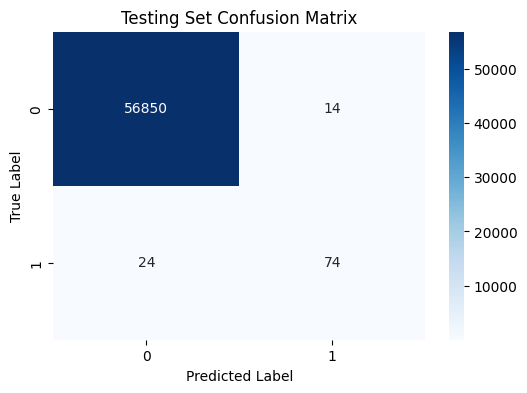

Confusion Matrix:
 [[56850    14]
 [   24    74]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.76      0.80        98

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Evaluar el rendimiento del modelo utilizando los datos de prueba
# Compute confusion matrix for testing set
cm = confusion_matrix(y_test, y_pred)

# Create heatmap plot of confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Testing Set Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Confusion Matrix:\n", cm)
print("\n Classification Report:\n", classification_report(y_test, y_pred))

### Undersampling

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Undersample the training set
undersampler = RandomUnderSampler(random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

# Definir el modelo de redes neuronales
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo con las métricas de precisión y recall
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Entrenar el modelo en el conjunto de entrenamiento y guardar el historial
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


2023-04-21 23:08:49.084676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - ETA: 0s - loss: 0.9108 - precision_1: 0.3966 - recall_1: 0.5847

2023-04-21 23:08:49.702290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 1s 32ms/step - loss: 0.9108 - precision_1: 0.3966 - recall_1: 0.5847 - val_loss: 0.3582 - val_precision_1: 1.0000 - val_recall_1: 0.9114
Epoch 2/20
20/20 [==============================] - 0s 12ms/step - loss: 0.6123 - precision_1: 0.5219 - recall_1: 0.7585 - val_loss: 0.2712 - val_precision_1: 1.0000 - val_recall_1: 0.8987
Epoch 3/20
20/20 [==============================] - 0s 11ms/step - loss: 0.4937 - precision_1: 0.6594 - recall_1: 0.7712 - val_loss: 0.2586 - val_precision_1: 1.0000 - val_recall_1: 0.8797
Epoch 4/20
20/20 [==============================] - 0s 11ms/step - loss: 0.4284 - precision_1: 0.7662 - recall_1: 0.7500 - val_loss: 0.2742 - val_precision_1: 1.0000 - val_recall_1: 0.8608
Epoch 5/20
20/20 [==============================] - 0s 11ms/step - loss: 0.4076 - precision_1: 0.8219 - recall_1: 0.7627 - val_loss: 0.2625 - val_precision_1: 1.0000 - val_recall_1: 0.8734
Epoch 6/20
20/20 [==============================] - 0s 12ms/step -

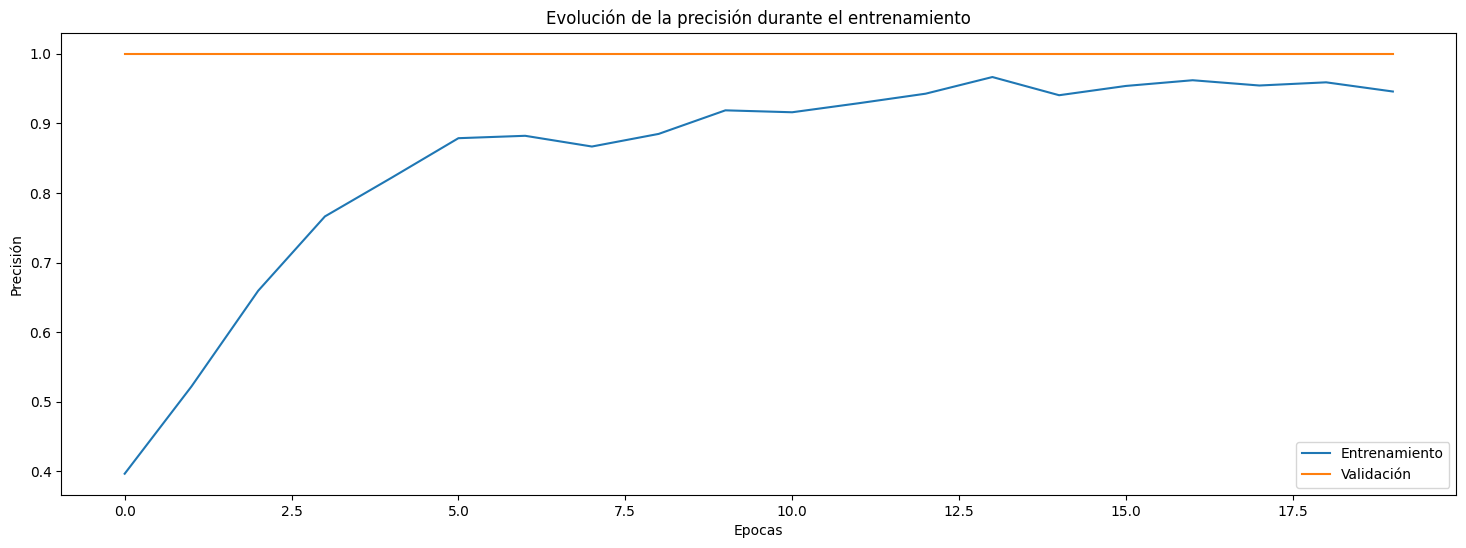

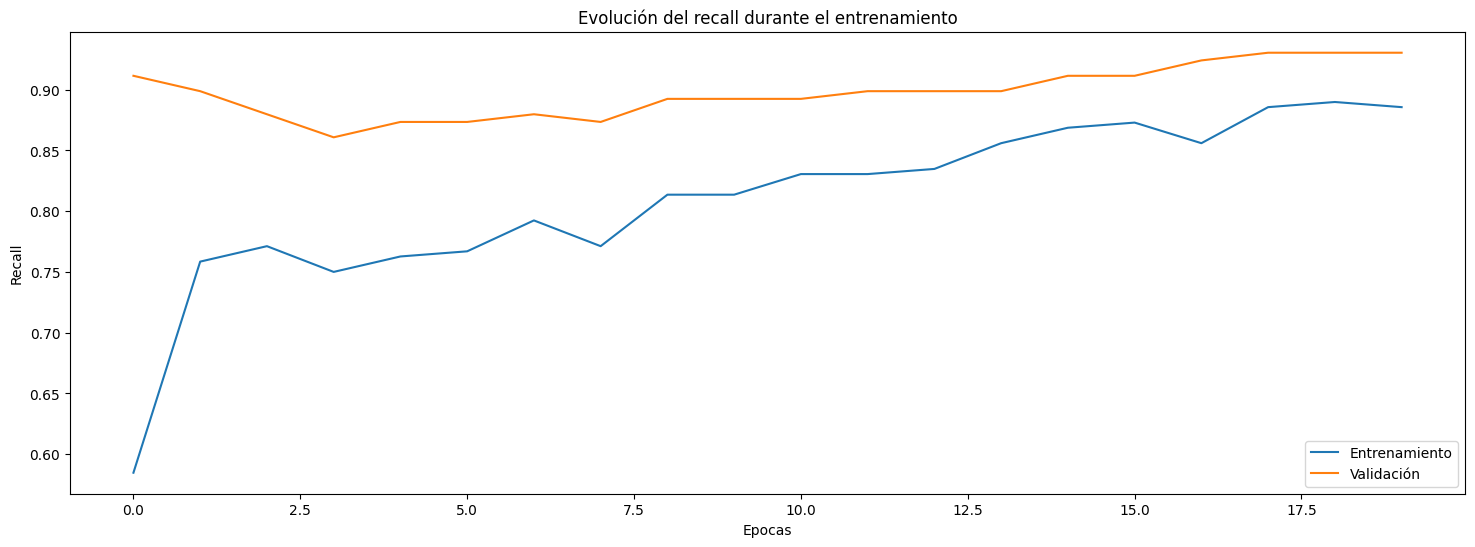

In [ ]:
# Visualizar la evolución de la precisión en el conjunto de entrenamiento y el conjunto de validación
plt.figure(figsize=(18,6))
plt.plot(history.history['precision_1'], label='Entrenamiento')
plt.plot(history.history['val_precision_1'], label='Validación')
plt.xlabel('Epocas')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión durante el entrenamiento')
plt.legend()
plt.show()

# Visualizar la evolución del recall en el conjunto de entrenamiento y el conjunto de validación
plt.figure(figsize=(18,6))
plt.plot(history.history['recall_1'], label='Entrenamiento')
plt.plot(history.history['val_recall_1'], label='Validación')
plt.xlabel('Epocas')
plt.ylabel('Recall')
plt.title('Evolución del recall durante el entrenamiento')
plt.legend()
plt.show()

In [ ]:
# Evaluar el rendimiento del modelo en el conjunto de prueba
score = model.evaluate(X_test, y_test)

# Hacer predicciones con el modelo entrenado
y_pred = model.predict(X_test)

# Convertir las probabilidades en etiquetas binarias
y_pred = (y_pred > 0.5).astype(int)

  96/1781 [>.............................] - ETA: 2s

2023-04-21 23:09:06.392948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1781/1781 [==============================] - 3s 2ms/step


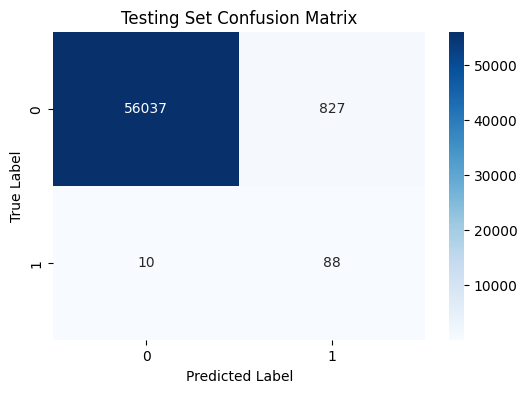

Confusion Matrix:
 [[56037   827]
 [   10    88]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.90      0.17        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.58     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
# Evaluar el rendimiento del modelo utilizando los datos de prueba
# Compute confusion matrix for testing set
cm = confusion_matrix(y_test, y_pred)

# Create heatmap plot of confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Testing Set Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Confusion Matrix:\n", cm)
print("\n Classification Report:\n", classification_report(y_test, y_pred))

### Oversampling

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Undersample the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Definir el modelo de redes neuronales
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo con las métricas de precisión y recall
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Entrenar el modelo en el conjunto de entrenamiento y guardar el historial
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-04-21 23:50:41.563729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-21 23:50:41.563877: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-04-21 23:50:41.766996: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2023-04-21 23:50:42.133283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11373/11373 [==============================] - ETA: 0s - loss: 0.0555 - precision: 0.9789 - recall: 0.9746

2023-04-21 23:52:24.833631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11373/11373 [==============================] - 119s 10ms/step - loss: 0.0555 - precision: 0.9789 - recall: 0.9746 - val_loss: 0.0195 - val_precision: 1.0000 - val_recall: 0.9947
Epoch 2/20
11373/11373 [==============================] - 121s 11ms/step - loss: 0.0166 - precision: 0.9942 - recall: 0.9966 - val_loss: 0.0069 - val_precision: 1.0000 - val_recall: 0.9990
Epoch 3/20
11373/11373 [==============================] - 120s 11ms/step - loss: 0.0116 - precision: 0.9963 - recall: 0.9978 - val_loss: 0.0014 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/20
11373/11373 [==============================] - 120s 11ms/step - loss: 0.0091 - precision: 0.9972 - recall: 0.9984 - val_loss: 5.1056e-04 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/20
11373/11373 [==============================] - 121s 11ms/step - loss: 0.0080 - precision: 0.9976 - recall: 0.9986 - val_loss: 0.0019 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 6/20
11373/11373 [==============================] - 122s

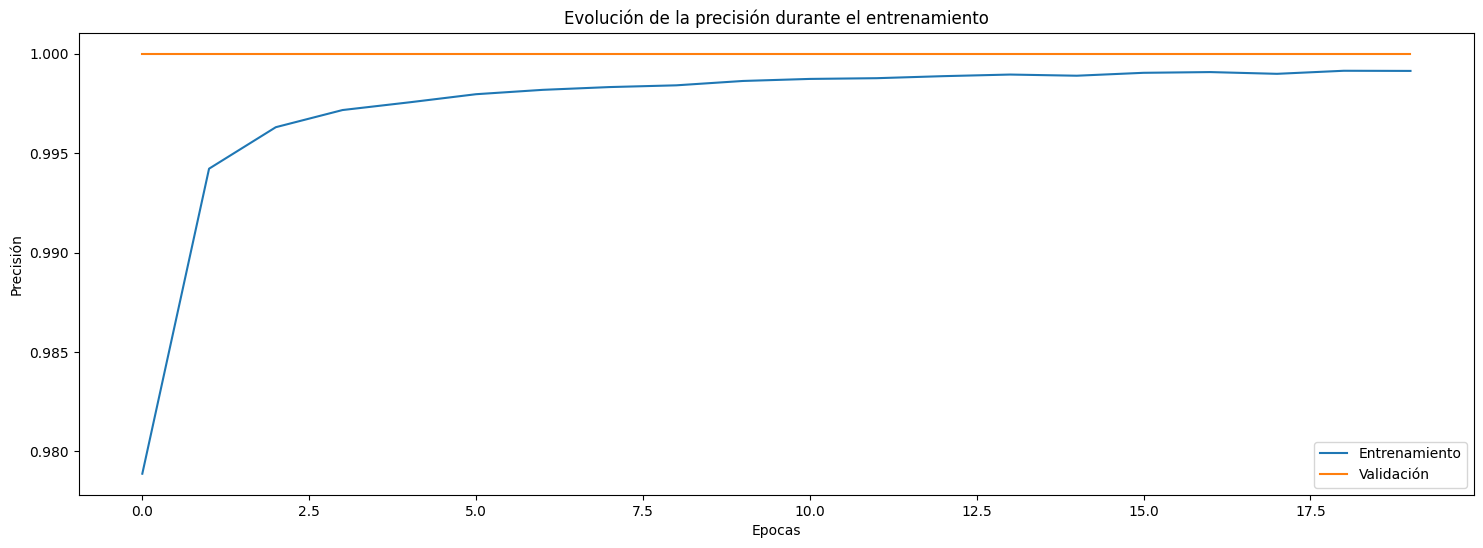

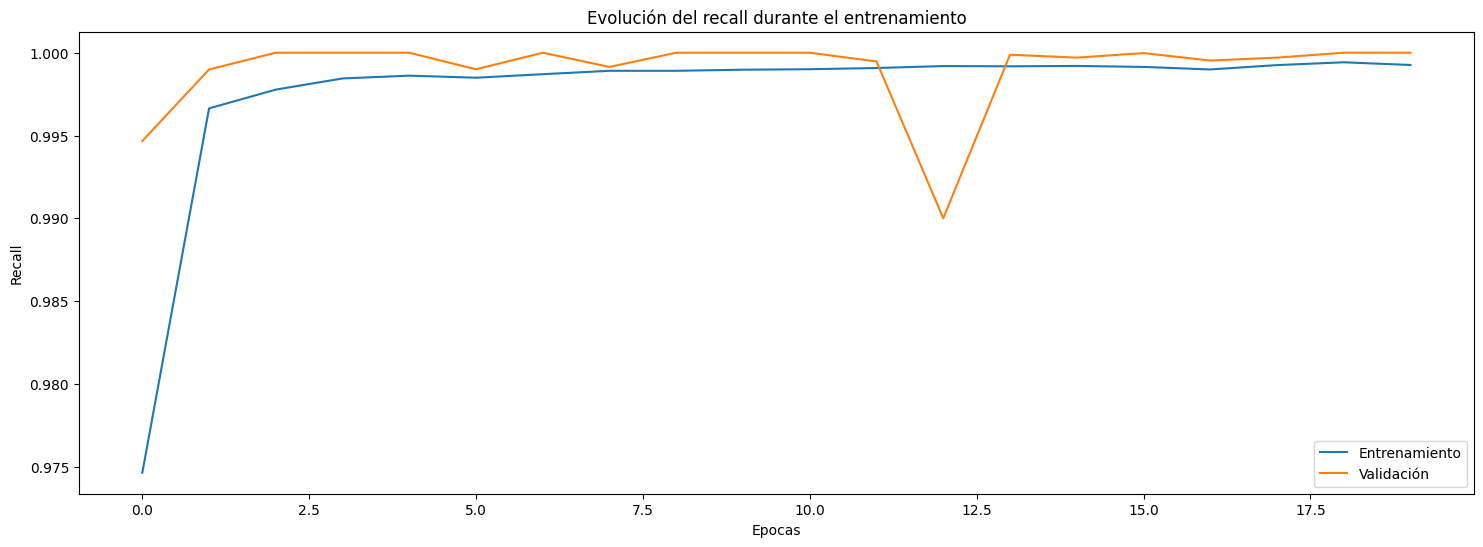

In [ ]:
# Visualizar la evolución de la precisión en el conjunto de entrenamiento y el conjunto de validación
plt.figure(figsize=(18,6))
plt.plot(history.history['precision'], label='Entrenamiento')
plt.plot(history.history['val_precision'], label='Validación')
plt.xlabel('Epocas')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión durante el entrenamiento')
plt.legend()
plt.show()

# Visualizar la evolución del recall en el conjunto de entrenamiento y el conjunto de validación
plt.figure(figsize=(18,6))
plt.plot(history.history['recall'], label='Entrenamiento')
plt.plot(history.history['val_recall'], label='Validación')
plt.xlabel('Epocas')
plt.ylabel('Recall')
plt.title('Evolución del recall durante el entrenamiento')
plt.legend()
plt.show()

In [ ]:
# Evaluar el rendimiento del modelo en el conjunto de prueba
score = model.evaluate(X_test, y_test)

# Hacer predicciones con el modelo entrenado
y_pred = model.predict(X_test)

# Convertir las probabilidades en etiquetas binarias
y_pred = (y_pred > 0.5).astype(int)

  88/1781 [>.............................] - ETA: 2s

2023-04-22 00:32:02.315036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1781/1781 [==============================] - 3s 2ms/step


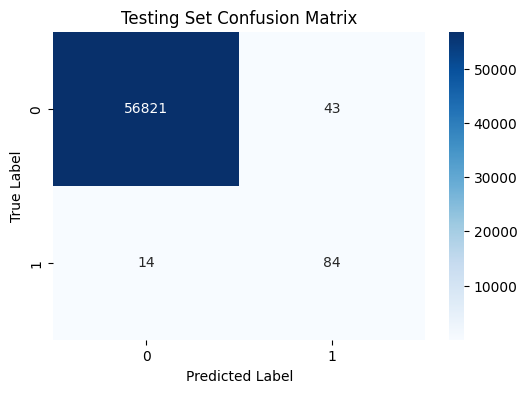

Confusion Matrix:
 [[56821    43]
 [   14    84]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.66      0.86      0.75        98

    accuracy                           1.00     56962
   macro avg       0.83      0.93      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Evaluar el rendimiento del modelo utilizando los datos de prueba
# Compute confusion matrix for testing set
cm = confusion_matrix(y_test, y_pred)

# Create heatmap plot of confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Testing Set Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Confusion Matrix:\n", cm)
print("\n Classification Report:\n", classification_report(y_test, y_pred))

A la hora de determinar cuál es el mejor modelo de Redes Neuronales Artificiales (ANN) en la detección de fraudes entre el dataset original, undersampling y oversampling, debemos analizar las métricas de evaluación proporcionadas en cada caso: precisión, recall, f1-score y accuracy.

1. Dataset original:
   - Precisión clase 1: 0.84
   - Recall clase 1: 0.76
   - F1-score clase 1: 0.80
   - Accuracy: 1.00

2. Undersampling:
   - Precisión clase 1: 0.10
   - Recall clase 1: 0.90
   - F1-score clase 1: 0.17
   - Accuracy: 0.99

3. Oversampling:
   - Precisión clase 1: 0.66
   - Recall clase 1: 0.86
   - F1-score clase 1: 0.75
   - Accuracy: 1.00

En el contexto de la detección de fraudes, es crucial detectar la mayor cantidad de fraudes verdaderos sin aumentar demasiado las falsas alarmas. Por lo tanto, las métricas más importantes a considerar son recall y precisión para la clase 1 (fraude).

- El modelo de undersampling tiene el mayor recall (0.90), pero su precisión es muy baja (0.10), lo que significa que identifica correctamente la mayoría de los fraudes, pero también produce muchas falsas alarmas (falsos positivos).
- El modelo de oversampling tiene un buen equilibrio entre recall (0.86) y precisión (0.66), lo que indica que puede detectar adecuadamente los casos de fraude y mantener las falsas alarmas en un nivel aceptable.
- El modelo del dataset original tiene una buena precisión (0.84) pero un recall más bajo (0.76) en comparación con el modelo de oversampling.

Teniendo en cuenta estos factores, el modelo de **oversampling** parece ser el mejor entre los tres, ya que ofrece un buen equilibrio entre recall y precisión para la detección de fraudes. Aunque el modelo del dataset original tiene una precisión ligeramente mejor, su recall es más bajo, lo que podría resultar en la falta de detección de algunos fraudes.

## KNN

### 1. KNN con Dataset desbalanceado

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

Separar en atributos (X) y etiquetas (y)

Se prepraran entradas.

In [ ]:
# Target and variable
X = df_scale_CreditCard.drop(['Class'], axis=1)
y = df_scale_CreditCard[['Class']]

# Split data en training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros X_train: ", len(X_train))
print("Tamaño del dataset X_train: ", X_train.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros X_test: ", len(X_test))
print("Tamaño del dataset X_test: ", X_test.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros y_train: ", len(y_train))
print("Tamaño del dataset y_train: ", y_train.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros y_test: ", len(y_test))
print("Tamaño del dataset y_test: ", y_test.shape)

Cantidad de registros X_train:  227845
Tamaño del dataset X_train:  (227845, 30)
Cantidad de registros X_test:  56962
Tamaño del dataset X_test:  (56962, 30)
Cantidad de registros y_train:  227845
Tamaño del dataset y_train:  (227845, 1)
Cantidad de registros y_test:  56962
Tamaño del dataset y_test:  (56962, 1)


Se determina el óptimo K con una lista de posibles valores de "k" y realizamos la validación cruzada de k-fold para cada valor de "k", utilizando la sensibilidad (recall) como métrica de evaluación. Finalmente, encontramos el valor óptimo de "k" con la sensibilidad media más alta y lo imprimimos.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir una lista de posibles valores de k
k_list = list(range(1, 10))

# Definir los parámetros de la cuadrícula para GridSearchCV
param_grid = {'n_neighbors': k_list}

# Crear una instancia de GridSearchCV y ajustar el modelo a los datos
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Imprimir los resultados de la búsqueda en cuadrícula
print("Mejor valor de k:", grid_search.best_params_['n_neighbors'])
print("Sensibilidad media en validación cruzada:", grid_search.best_score_)

Mejor valor de k: 1
Sensibilidad media en validación cruzada: 0.7731256085686466


Esto seguramente por la gran cantidad de datos en la clase dominante. En este caso, se encontró que el mejor desempeño se logró con k=1, lo que sugiere que el modelo es capaz de encontrar patrones y relaciones más precisos utilizando solo el vecino más cercano.

Preparación algoritmo KNN - K=1

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
kf = StratifiedKFold(n_splits=8, random_state=None, shuffle=True)

Ajuste del modelo KNN a los datos de entrenamiento. Ejecución algoritmo KNN.

In [ ]:
knn.fit(X_train, y_train)

# Predicciones
y_pred = knn.predict(X_test)

In [ ]:
# Evaluamos la precisión del modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56847    15]
 [   16    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.85      0.84      0.84       100

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



La matriz de confusión muestra que el modelo identificó correctamente 3 transacciones fraudulentas y clasificó correctamente 56847 transacciones no fraudulentas. Sin embargo, clasificó incorrectamente 16 transacciones fraudulentas como no fraudulentas, lo cual es un problema en el contexto de la detección de fraudes con tarjetas de crédito.

El recall para la clase 0 es perfecto (100%), lo que significa que el modelo identificó correctamente las transacciones no fraudulentas. Sin embargo, el recall para la clase 1 es menor (84%), lo que indica que el modelo omitió algunas de las transacciones fraudulentas en el conjunto de prueba.

La puntuación F1 tiene en cuenta tanto la precisión como la recuperación y proporciona una medida única del rendimiento del modelo. La puntuación F1 para la clase 0 es muy alta (100 %), lo que indica que el modelo funciona muy bien para transacciones no fraudulentas. La puntuación F1 para la clase 1 es más baja (84%), lo que indica que el modelo podría beneficiarse de un mayor ajuste para mejorar la identificación de transacciones fraudulentas.

### KNN con Dataset balanceado

Como la mayoría de las transacciones no son fraudulentas, si usamos este marco de datos como base para nuestros modelos y análisis predictivos, podríamos obtener muchos errores y nuestros algoritmos probablemente se sobreajustarán, ya que "supondrán" que la mayoría de las transacciones no son fraude. Todo lo contrario, buscamos que nuestro modelo detecte patrones que den señales de fraude.
El desbalance de clases es algo que sucede habitualmente dentro del ámbito de clasificación. Por lo que utilizaremos técnicas para tratar de revertir este problema.




#### 2. KNN - Random Under-Sampling con Imblearn
La biblioteca: imblearn se usa para muestrear conjuntos de datos desequilibrados y mejorar el rendimiento de su modelo.

RandomUnderSampler es una forma rápida y sencilla de equilibrar los datos seleccionando aleatoriamente un subconjunto de datos para las clases objetivo. Muestrear por debajo de la(s) clase(s) mayoritaria(s) seleccionando muestras al azar con o sin reemplazo.

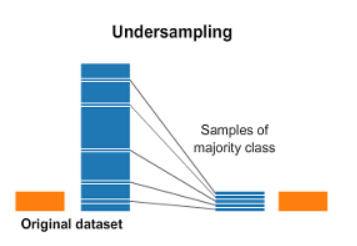

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Target and variable
X = df_scale_CreditCard.drop(['Class'], axis=1)
y = df_scale_CreditCard[['Class']]

# Split data en training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Se aplica undersampling solo al dataset de training
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros X_train: ", len(X_train))
print("Tamaño del dataset X_train: ", X_train.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros X_test: ", len(X_test))
print("Tamaño del dataset X_test: ", X_test.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros y_train: ", len(y_train))
print("Tamaño del dataset y_train: ", y_train.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros y_test: ", len(y_test))
print("Tamaño del dataset y_test: ", y_test.shape)

# Cantidad de registros undersampled utilizando la función len() y .shape
print("Cantidad de registros X_train_resampled: ", len(X_train_resampled))
print("Tamaño del dataset X_train_resampled: ", X_train_resampled.shape)

# Cantidad de registros undersampled utilizando la función len() y .shape
print("Cantidad de registros y_train_resampled: ", len(y_train_resampled))
print("Tamaño del dataset y_train_resampled: ", y_train_resampled.shape)


Cantidad de registros X_train:  227845
Tamaño del dataset X_train:  (227845, 30)
Cantidad de registros X_test:  56962
Tamaño del dataset X_test:  (56962, 30)
Cantidad de registros y_train:  227845
Tamaño del dataset y_train:  (227845, 1)
Cantidad de registros y_test:  56962
Tamaño del dataset y_test:  (56962, 1)
Cantidad de registros X_train_resampled:  784
Tamaño del dataset X_train_resampled:  (784, 30)
Cantidad de registros y_train_resampled:  784
Tamaño del dataset y_train_resampled:  (784, 1)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir una lista de posibles valores de k
k_list = list(range(1, 10))

# Definir los parámetros de la cuadrícula para GridSearchCV
param_grid = {'n_neighbors': k_list}

# Crear una instancia de GridSearchCV y ajustar el modelo a los datos
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_resampled, y_train_resampled)

# Imprimir los resultados de la búsqueda en cuadrícula
print("Mejor valor de k:", grid_search.best_params_['n_neighbors'])
print("Sensibilidad media en validación cruzada:", grid_search.best_score_)

Mejor valor de k: 1
Sensibilidad media en validación cruzada: 0.9210321324245374


Nos sigue saliendo el valor óptimo de K=1.

In [ ]:
# Se entrena KNN model en el dataset con undersampling
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_resampled, y_train_resampled)

# Evaluamos el modelo KNN en testing data que no fue tocada
y_pred = knn.predict(X_test)


# Evaluamos la precisión del modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[53354  3508]
 [    8    92]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56862
           1       0.03      0.92      0.05       100

    accuracy                           0.94     56962
   macro avg       0.51      0.93      0.51     56962
weighted avg       1.00      0.94      0.97     56962



La matriz de confusión indica que el modelo predijo 53354 transacciones no fraudulentas correctamente identificadas como no fraudulentas y 92 transacciones fraudulentas correctamente identificadas como fraudulentas, pero también predijo 8 transacciones fraudulentas identificadas incorrectamente como no fraudulentas y 92 transacciones no fraudulentas identificadas incorrectamente como fraudulentas.

De acuerdo a los valores mostrados, el modelo está funcionando bien en términos de precisión y recall para transacciones no fraudulentas, pero no tan bien para transacciones fraudulentas.

El modelo tiene una alta precisión 100% (índice de falsos positivos bajo) para transacciones no fraudulentas, pero una precisión baja 0.03% (índice de falsos positivos alto) para transacciones fraudulentas. El recall de las transacciones fraudulentas es alto 92%, lo que indica que el modelo puede identificar correctamente la mayoría de las transacciones fraudulentas, pero la puntuación F1 general es baja debido a la baja precisión de las transacciones fraudulentas.

Lo cual, el modelo podría beneficiarse de más ajustes y optimización para mejorar su rendimiento frente a transacciones fraudulentas a pesar del sampling realizado.

#### 3. KNN Random Over-Sampling con imblearn

Una forma de combatir los datos desequilibrados es generar nuevas muestras en las clases minoritarias. La estrategia más ingenua es generar nuevas muestras mediante muestreo aleatorio con el reemplazo de las muestras actualmente disponibles. El RandomOverSampler ofrece tal esquema.

En este caso, RandomOverSampler se utiliza para aumentar el número de muestras en la clase minoritaria, en lugar de reducir las muestras en la clase mayoritaria como lo hace RandomUnderSampler. El parámetro random_state se establece en 42 para garantizar la reproducibilidad de los resultados.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Target and variable
X = df_scale_CreditCard.drop(['Class'], axis=1)
y = df_scale_CreditCard[['Class']]

# Split data en training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


# Se aplica oversampling solo al dataset de training
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros X_train: ", len(X_train))
print("Tamaño del dataset X_train: ", X_train.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros X_test: ", len(X_test))
print("Tamaño del dataset X_test: ", X_test.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros y_train: ", len(y_train))
print("Tamaño del dataset y_train: ", y_train.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros y_test: ", len(y_test))
print("Tamaño del dataset y_test: ", y_test.shape)

# Cantidad de registros undersampled utilizando la función len() y .shape
print("Cantidad de registros X_train_resampled: ", len(X_train_resampled))
print("Tamaño del dataset X_train_resampled: ", X_train_resampled.shape)

# Cantidad de registros undersampled utilizando la función len() y .shape
print("Cantidad de registros y_train_resampled: ", len(y_train_resampled))
print("Tamaño del dataset y_train_resampled: ", y_train_resampled.shape)


Cantidad de registros X_train:  227845
Tamaño del dataset X_train:  (227845, 30)
Cantidad de registros X_test:  56962
Tamaño del dataset X_test:  (56962, 30)
Cantidad de registros y_train:  227845
Tamaño del dataset y_train:  (227845, 1)
Cantidad de registros y_test:  56962
Tamaño del dataset y_test:  (56962, 1)
Cantidad de registros X_train_resampled:  454906
Tamaño del dataset X_train_resampled:  (454906, 30)
Cantidad de registros y_train_resampled:  454906
Tamaño del dataset y_train_resampled:  (454906, 1)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir una lista de posibles valores de k
k_list = list(range(1, 10))

# Definir los parámetros de la cuadrícula para GridSearchCV
param_grid = {'n_neighbors': k_list}

# Crear una instancia de GridSearchCV y ajustar el modelo a los datos
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_resampled, y_train_resampled)

# Imprimir los resultados de la búsqueda en cuadrícula
print("Mejor valor de k:", grid_search.best_params_['n_neighbors'])
print("Sensibilidad media en validación cruzada:", grid_search.best_score_)

Mejor valor de k: 1
Sensibilidad media en validación cruzada: 1.0


In [ ]:
# Se entrena KNN model en el dataset con undersampling
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_resampled, y_train_resampled)

# Evaluamos el modelo KNN en testing data que no fue tocada
y_pred = knn.predict(X_test)


# Evaluamos la precisión del modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52970  3894]
 [    7    91]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56864
           1       0.02      0.93      0.04        98

    accuracy                           0.93     56962
   macro avg       0.51      0.93      0.50     56962
weighted avg       1.00      0.93      0.96     56962



Con over-sampling hay 52970 transacciones no fraudulentas previstas como no fraudulentas, 91 transacciones fraudulentas previstas como fraudulentas, 7 transacciones fraudulentas previstas como no fraudulentas y 3894 transacciones no fraudulentas previstas como fraudulentas.

El recall (porcentaje de instancias positivas reales identificadas correctamente por el modelo)para la clase 0 es 93%, lo que significa que el modelo identificó correctamente las instancias de la clase 0. El recall para la clase 1 es 0,94, lo que significa que de todas las instancias reales de la clase 1, el modelo identificó correctamente el 94 %. No muy bueno si estamos prediciendo transacciones fraudulentas.

## Conclusiones KNN

Con el modelo KNN, podemos ver que existe una mejor predicción con el dataset con técnica Over-Sampling si consideramos el Recall para la clase 1 de un 93%, prediciendo 91 transacciones fraude y 7 que deberían haber sido clasificadas como fraude, sin embargo, su precisión es muy baja, es decir que el modelo no realiza su tarea de una forma óptima.
Los modelos tienen dificultades para detectar transacciones fraudulentas, lo que sugiere que se necesitan técnicas de modelado más avanzadas o más datos para mejorar el rendimiento del modelo. También se observa una clara asimetría en la precisión y recall entre las clases, por lo que es necesario prestar atención al balance de clases en el conjunto de datos y tomar medidas para abordar este problema.


## SVM - Support Vector Machine

### SVM con Dataset desbalanceado

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


Separar en atributos (X) y etiquetas (y). Se prepraran entradas.

In [ ]:
X = df_scale_CreditCard.drop(['Class'], axis=1)
y = df_scale_CreditCard['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros X_train: ", len(X_train))
print("Tamaño del dataset X_train: ", X_train.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros X_test: ", len(X_test))
print("Tamaño del dataset X_test: ", X_test.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros y_train: ", len(y_train))
print("Tamaño del dataset y_train: ", y_train.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros y_test: ", len(y_test))
print("Tamaño del dataset y_test: ", y_test.shape)


Cantidad de registros X_train:  227845
Tamaño del dataset X_train:  (227845, 30)
Cantidad de registros X_test:  56962
Tamaño del dataset X_test:  (56962, 30)
Cantidad de registros y_train:  227845
Tamaño del dataset y_train:  (227845,)
Cantidad de registros y_test:  56962
Tamaño del dataset y_test:  (56962,)


Búsqueda de mejores parámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir la lista de parámetros a ajustar y sus valores posibles
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1'],
    'loss': ['hinge', 'log'],
    'max_iter': [1000, 2000, 3000]
}

# Definir el modelo base
base_model = SGDClassifier(tol=1e-3)

# Definir el objeto de búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Ajustar el objeto de búsqueda en cuadrícula con los datos de entrenamiento
grid_result = grid_search.fit(X_train, y_train)

# Mostrar los resultados
print(f"Mejor precisión: {grid_result.best_score_:.3f}")
print(f"Mejores hiperparámetros: {grid_result.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejor precisión: 0.999
Mejores hiperparámetros: {'alpha': 0.001, 'loss': 'log', 'max_iter': 3000, 'penalty': 'l1'}


Ejecución del algoritmo

In [ ]:
from sklearn import svm
from sklearn.linear_model import SGDClassifier
# entrenamiento modelo SVM
model = SGDClassifier(loss='log', penalty='l1', alpha=0.001, max_iter=3000, tol=1e-3)
model.fit(X_train, y_train)


# realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# evalúa la precisión del modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56854    10]
 [   53    45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.46      0.59        98

    accuracy                           1.00     56962
   macro avg       0.91      0.73      0.79     56962
weighted avg       1.00      1.00      1.00     56962



El modelo clasificó correctamente 56854 de 56864 casos no fraude (verdaderos no fraude) y 45 de 98 casos de fraude. Clasificó erróneamente 10 casos no fraude como fraude (falsos positivos) y 53 casos fraudes como no fraude.

La precisión del modelo para casos positivos es de 0,82, lo que significa que cuando el modelo predice un caso positivo, es correcto el 82 % de las veces. El recall del modelo para casos de fraude es de 0,46, lo que significa que el modelo identifica correctamente el 46% de todos los casos positivos de fraude. Una muy baja métrica por lo que requeire ajuste del modelo o preprocesamiento de datos.

### SVM con Dataset balanceado

#### SVM Random Under-Sampling con Imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
X = df_scale_CreditCard.drop(['Class'], axis=1)
y = df_scale_CreditCard['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Se aplica undersampling solo al dataset de training
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros X_train: ", len(X_train))
print("Tamaño del dataset X_train: ", X_train.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros X_test: ", len(X_test))
print("Tamaño del dataset X_test: ", X_test.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros y_train: ", len(y_train))
print("Tamaño del dataset y_train: ", y_train.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros y_test: ", len(y_test))
print("Tamaño del dataset y_test: ", y_test.shape)

# Cantidad de registros undersampled utilizando la función len() y .shape
print("Cantidad de registros X_train_resampled: ", len(X_train_resampled))
print("Tamaño del dataset X_train_resampled: ", X_train_resampled.shape)

# Cantidad de registros undersampled utilizando la función len() y .shape
print("Cantidad de registros y_train_resampled: ", len(y_train_resampled))
print("Tamaño del dataset y_train_resampled: ", y_train_resampled.shape)



Cantidad de registros X_train:  227845
Tamaño del dataset X_train:  (227845, 30)
Cantidad de registros X_test:  56962
Tamaño del dataset X_test:  (56962, 30)
Cantidad de registros y_train:  227845
Tamaño del dataset y_train:  (227845,)
Cantidad de registros y_test:  56962
Tamaño del dataset y_test:  (56962,)
Cantidad de registros X_train_resampled:  788
Tamaño del dataset X_train_resampled:  (788, 30)
Cantidad de registros y_train_resampled:  788
Tamaño del dataset y_train_resampled:  (788,)


Búsqueda de mejores parámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir la lista de parámetros a ajustar y sus valores posibles
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1'],
    'loss': ['hinge', 'log'],
    'max_iter': [1000, 2000, 3000]
}

# Definir el modelo base
base_model = SGDClassifier(tol=1e-3)

# Definir el objeto de búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Ajustar el objeto de búsqueda en cuadrícula con los datos de entrenamiento
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)

# Mostrar los resultados
print(f"Mejor precisión: {grid_result.best_score_:.3f}")
print(f"Mejores hiperparámetros: {grid_result.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejor precisión: 0.938
Mejores hiperparámetros: {'alpha': 0.01, 'loss': 'log', 'max_iter': 2000, 'penalty': 'l1'}


Ejecución del algoritmo

In [ ]:
from sklearn import svm
from sklearn.linear_model import SGDClassifier
# entrenamiento modelo SVM
model = SGDClassifier(loss='log', penalty='l1', alpha=0.01, max_iter=2000, tol=1e-3)
model.fit(X_train_resampled, y_train_resampled)


# realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# evalúa la precisión del modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[53835  3029]
 [    7    91]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.93      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.94      0.51     56962
weighted avg       1.00      0.95      0.97     56962



El modelo clasificó correctamente 53835 de 56864 casos no fraude y 91 de 98 casos de fraude (verdaderos positivos). Clasificó erróneamente 3029 transacciones de no fraude y 7 transacciones fraude como no fraude.

El recall del modelo para casos de no fraude 95% y fraude es de 93%.

En general, el modelo tiene un recall relativamente alto pero una precisión muy baja y una puntuación F1 para los casos de fraude. Esto sugiere que el modelo está identificando muchos falsos positivos, lo que podría deberse a un desequilibrio de clases u otros factores.

#### SVM Random Over-Sampling con imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Target and variable
X = df_scale_CreditCard.drop(['Class'], axis=1)
y = df_scale_CreditCard[['Class']]

# Split data en training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Se aplica oversampling solo al dataset de training
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros X_train: ", len(X_train))
print("Tamaño del dataset X_train: ", X_train.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros X_test: ", len(X_test))
print("Tamaño del dataset X_test: ", X_test.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros y_train: ", len(y_train))
print("Tamaño del dataset y_train: ", y_train.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros y_test: ", len(y_test))
print("Tamaño del dataset y_test: ", y_test.shape)

# Cantidad de registros undersampled utilizando la función len() y .shape
print("Cantidad de registros X_train_resampled: ", len(X_train_resampled))
print("Tamaño del dataset X_train_resampled: ", X_train_resampled.shape)

# Cantidad de registros undersampled utilizando la función len() y .shape
print("Cantidad de registros y_train_resampled: ", len(y_train_resampled))
print("Tamaño del dataset y_train_resampled: ", y_train_resampled.shape)


Cantidad de registros X_train:  227845
Tamaño del dataset X_train:  (227845, 30)
Cantidad de registros X_test:  56962
Tamaño del dataset X_test:  (56962, 30)
Cantidad de registros y_train:  227845
Tamaño del dataset y_train:  (227845, 1)
Cantidad de registros y_test:  56962
Tamaño del dataset y_test:  (56962, 1)
Cantidad de registros X_train_resampled:  454906
Tamaño del dataset X_train_resampled:  (454906, 30)
Cantidad de registros y_train_resampled:  454906
Tamaño del dataset y_train_resampled:  (454906, 1)


Búsqueda de mejores parámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir la lista de parámetros a ajustar y sus valores posibles
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1'],
    'loss': ['hinge', 'log'],
    'max_iter': [1000, 2000, 3000]
}

# Definir el modelo base
base_model = SGDClassifier(tol=1e-3)

# Definir el objeto de búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Ajustar el objeto de búsqueda en cuadrícula con los datos de entrenamiento
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)

# Mostrar los resultados
print(f"Mejor precisión: {grid_result.best_score_:.3f}")
print(f"Mejores hiperparámetros: {grid_result.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejor precisión: 0.951
Mejores hiperparámetros: {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'}


Ejecución de algortimo

In [ ]:
# entrena un modelo SVM
# entrenamiento modelo SVM
model = SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, max_iter=1000, tol=1e-3)
model.fit(X_train_resampled, y_train_resampled)

# realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# evalúa la precisión del modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[55474  1388]
 [    9    91]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56862
           1       0.06      0.91      0.12       100

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



El modelo clasificó correctamente 55474 de 56862 casos no fraude y 91 de 100 casos fraude (verdaderos positivos). Clasificó erróneamente 1388 casos no fraude (falsos positivos) y 9 casos fraude como no fraude (falsos negativos).

El recall del modelo para casos no fraude es de 0,98, lo que significa que el modelo identifica correctamente el 98% de todos los casos no fraude. Y en un 91% los casos de fraude.

En general, el modelo tiene un alto recall pero baja precisión y puntuación F1 para casos de no fraude, lo que sugiere que está identificando muchos falsos positivos. La precisión general es alta, pero esto se debe a la gran cantidad de casos negativos en el conjunto de prueba. Se pueden realizar mejoras ajustando el modelo o el preprocesamiento de datos para mejorar el rendimiento en la clase positiva.

## Conclusiones SVM

En general, los modelos parecen tener una alta precisión para la clase 0, pero una precisión variable para la clase 1. El recall y el F1-score también varían considerablemente según el modelo y la clase.

## XGBOOST

*  Algoritmo de aprendizaje de máquina, aplicado a la clasificación y regresión, asimismo, combina árboles de decisión débiles para hacer uno más fuerte.

1. Pro
  - XGBoost es altamente escalable, rápido y tiene una precisión excepcional, amplia variedad de parámetros de ajuste..
 - Maneja grandes bases de datos con multiples variables.
 - Maneja valores perdidos.
 - Resultados precisos
 - Excelente velocidad de ejecución.

2. Contra
 - Recursos computaciones alto
 - Ajustar correctamente los parámetros para mejorar la   - precision y evitar el sobreajuste.
 - Solo trabaja en vectores numéricos, salvo la conversión previa.

In [ ]:
#Modelo XG Boost
import xgboost as xgb

#Train test split
from sklearn.model_selection import train_test_split

#Optimizacion de hiperparámetros
from sklearn.model_selection import GridSearchCV

#Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from imblearn.under_sampling import RandomUnderSampler

Separar en atributos (X) y etiquetas (y)

In [ ]:
#Aleatorizar las observaciones
df_scaled_shuffled = df_scale_CreditCard.sample(frac=1)

# Target and variable
X = df_scaled_shuffled.drop(['Class'], axis=1)
y = df_scaled_shuffled[['Class']]

# Split data en training and testing sets
x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros X_train: ", len(x_train_xgb))
print("Tamaño del dataset X_train   : ", x_train_xgb.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros X_test : ", len(x_test_xgb))
print("Tamaño del dataset X_test    : ", x_test_xgb.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros y_train: ", len(y_train_xgb))
print("Tamaño del dataset y_train.  : ", y_train_xgb.shape)

# Cantidad de registros originales utilizando la función len() y .shape
print("Cantidad de registros y_test : ", len(y_test))
print("Tamaño del dataset y_test.   : ", y_test.shape)

Cantidad de registros X_train:  227845
Tamaño del dataset X_train   :  (227845, 30)
Cantidad de registros X_test :  56962
Tamaño del dataset X_test    :  (56962, 30)
Cantidad de registros y_train:  227845
Tamaño del dataset y_train.  :  (227845, 1)
Cantidad de registros y_test :  56962
Tamaño del dataset y_test.   :  (56962, 1)


### 1. XGBoost con Dataset desbalanceado

In [ ]:
# Optimización de hiperparámetros
xgb_gs = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)
params = {
    'max_depth'   : [3,5,8,10,15],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators' : [100, 120, 150],
}
gs = GridSearchCV(xgb_gs, params, scoring="recall", cv=10, verbose=10)
gs.fit(x_train_xgb, y_train_xgb)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV 1/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 1/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.692 total time=   1.2s
[CV 2/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 2/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.769 total time=   0.4s
[CV 3/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 3/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.795 total time=   0.4s
[CV 4/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 4/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.872 total time=   0.4s
[CV 5/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 5/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.769 total time=   0.4s
[CV 6/10; 1/45] S

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None, gpu_id=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, ma...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 10, 15],
                         'n_estimators': [100, 120, 150]},
             scoring='recall', verbose=10)

In [ ]:
print(f"Mejores hiperparámetros: {gs.best_params_} (Recall = {gs.best_score_})")
#params = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}

Mejores hiperparámetros: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150} (Recall = 0.8012145748987856)


In [ ]:
model_xgb_unbalanced = xgb.XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=150, tree_method='gpu_hist', gpu_id=0)
model_xgb_unbalanced.fit(x_train_xgb, y_train_xgb)

y_test_prediccion_ub     = model_xgb_unbalanced.predict(x_test_xgb)
precision_xgb_unbalanced = precision_score(y_test_xgb, y_test_prediccion_ub)
recall_xgb_unbalanced    = recall_score(y_test_xgb, y_test_prediccion_ub)
f1_xgb_unbalanced        = f1_score(y_test_xgb, y_test_prediccion_ub)
accuracy_xgb_unbalanced  = accuracy_score(y_test_xgb, y_test_prediccion_ub)
cm_xgb_unbalanced        = confusion_matrix(y_test_xgb, y_test_prediccion_ub)

print("Métricas - Modelo XGBoost - Data desbalanceada\n")

print(f"Precision: {round(precision_xgb_unbalanced,3)}")
print(f"Recall.  : {round(recall_xgb_unbalanced,3)}")
print(f"F1 Score : {round(f1_xgb_unbalanced,3)}")
print(f"Accuracy : {round(accuracy_xgb_unbalanced,3)}\n")

# Evaluamos la precisión del modelo
print(confusion_matrix(y_test_xgb, y_test_prediccion_ub))
print("\n")
print(classification_report(y_test_xgb, y_test_prediccion_ub))


Métricas - Modelo XGBoost - Data desbalanceada

Precision: 0.952
Recall.  : 0.762
F1 Score : 0.847
Accuracy : 0.999

[[56853     4]
 [   25    80]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.95      0.76      0.85       105

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962




1. Resumen de los pasos

*  Escalarar la data
*  Separar la data en test y train
*  Optimizar los parámetros sobre la data train
*  Se ha usado los mejores hiperparámetros durante el entrenamiento del modelo de aprendizaje automático para tener el óptimo rendimiento de la base de datos entrenada.

*  Los 3 modelos presentan una precisión variada del [4% al 100%].




### XGBoost con Dataset balanceado

#### 2. Random Under-Sampling con Imblearn

In [ ]:
#Undersampling de la base de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
x_train_undersampled_xgb, y_train_undersampled_xgb = undersampler.fit_resample(x_train_xgb, y_train_xgb)

In [ ]:
x_train_undersampled_xgb.shape

(774, 30)

In [ ]:
y_train_undersampled_xgb.value_counts()

Class
0        387
1        387
dtype: int64

In [ ]:
#optimizacion de hiperparámetros - base de entrenamiento con undersampling
xgb_gs = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)

params = {
    'max_depth': [3,5,8,10,15],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 120, 150],
}
gs = GridSearchCV(xgb_gs, params, scoring = "recall" , cv=10, verbose = 10)
gs.fit(x_train_undersampled_xgb, y_train_undersampled_xgb)


Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV 1/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 1/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 2/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.897 total time=   0.1s
[CV 3/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 3/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.846 total time=   0.1s
[CV 4/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 4/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.949 total time=   0.1s
[CV 5/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 5/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.895 total time=   0.1s
[CV 6/10; 1/45] S

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None, gpu_id=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, ma...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 10, 15],
                         'n_estimators': [100, 120, 150]},
             scoring='recall', verbose=10)

In [ ]:
 print(f"Mejores hiperparámetros: {gs.best_params_} (Recall = {gs.best_score_})")
# params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100} (Recall = 0.917476383265857)


In [ ]:
model_xgb_undersampled = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100,tree_method='gpu_hist', gpu_id=0)
model_xgb_undersampled.fit(x_train_undersampled_xgb, y_train_undersampled_xgb)

#Predicción de las clases de la base de test
y_test_prediccion_undersampled    = model_xgb_undersampled.predict(x_test_xgb)
precision_xgb_undersampled = precision_score(y_test_xgb, y_test_prediccion_undersampled)
recall_xgb_undersampled    = recall_score(y_test_xgb, y_test_prediccion_undersampled)
f1_xgb_undersampled        = f1_score(y_test_xgb, y_test_prediccion_undersampled)
accuracy_xgb_undersampled  = accuracy_score(y_test_xgb, y_test_prediccion_undersampled)
cm_xgb_undersampled        = confusion_matrix(y_test_xgb, y_test_prediccion_undersampled)

print("Métricas - Modelo XGBoost - Data balanceada con undersampling\n")

print(f"Precision: {round(precision_xgb_undersampled,3)}")
print(f"Recall:    {round(recall_xgb_undersampled,3)}")
print(f"F1 Score:  {round(f1_xgb_undersampled,3)}")
print(f"Accuracy:  {round(accuracy_xgb_undersampled,3)}\n")

# Evaluamos la precisión del modelo
print(confusion_matrix(y_test_xgb, y_test_prediccion_undersampled))
print("\n")
print(classification_report(y_test_xgb, y_test_prediccion_undersampled))


Métricas - Modelo XGBoost - Data balanceada con undersampling

Precision: 0.043
Recall:    0.924
F1 Score:  0.083
Accuracy:  0.962

[[54709  2148]
 [    8    97]]


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56857
           1       0.04      0.92      0.08       105

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



#### 3. Random Over-Sampling con Imblearn

In [ ]:
# Se aplica oversampling solo al dataset de training
oversampler = RandomOverSampler(random_state=42)
x_train_oversampled_xgb, y_train_oversampled_xgb = oversampler.fit_resample(x_train_xgb, y_train_xgb)


In [ ]:
x_train_oversampled_xgb.shape

(454916, 30)

In [ ]:
y_train_oversampled_xgb.value_counts()

Class
0        227458
1        227458
dtype: int64

In [ ]:
#optimizacion de hiperparámetros - base de entrenamiento con oversampling
xgb_gs = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)

params = {
    'max_depth': [3,5,8,10,15],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 120, 150],
}
gs = GridSearchCV(xgb_gs, params, scoring = "recall" , cv=10, verbose = 10)
gs.fit(x_train_oversampled_xgb, y_train_oversampled_xgb)


Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV 1/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 1/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.920 total time=   0.7s
[CV 2/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 2/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.916 total time=   0.8s
[CV 3/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 3/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.926 total time=   0.8s
[CV 4/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 4/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.918 total time=   0.8s
[CV 5/10; 1/45] START learning_rate=0.01, max_depth=3, n_estimators=100.........
[CV 5/10; 1/45] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.916 total time=   0.6s
[CV 6/10; 1/45] S

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None, gpu_id=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, ma...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 10, 15],
                         'n_estimators': [100, 120, 150]},
             scoring='recall', verbose=10)

In [ ]:
 print(f"Mejores hiperparámetros: {gs.best_params_} (Recall = {gs.best_score_})")
# params = {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 150}

Mejores hiperparámetros: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 150} (Recall = 1.0)


In [ ]:
model_xgb_oversampled = xgb.XGBClassifier(learning_rate=0.01, max_depth=8, n_estimators=150,tree_method='gpu_hist', gpu_id=0)
model_xgb_oversampled.fit(x_train_oversampled_xgb, y_train_oversampled_xgb)

#Predicción de las clases de la base de test
y_test_prediccion_oversampled    = model_xgb_oversampled.predict(x_test_xgb)
precision_xgb_oversampled = precision_score(y_test_xgb, y_test_prediccion_oversampled)
recall_xgb_oversampled    = recall_score(y_test_xgb, y_test_prediccion_oversampled)
f1_xgb_oversampled        = f1_score(y_test_xgb, y_test_prediccion_oversampled)
accuracy_xgb_oversampled  = accuracy_score(y_test_xgb, y_test_prediccion_oversampled)
cm_xgb_oversampled        = confusion_matrix(y_test_xgb, y_test_prediccion_oversampled)


print("Métricas - Modelo XGBoost - Data balanceada con oversampling\n")
print(f"Precision: {round(precision_xgb_oversampled,3)}")
print(f"Recall:    {round(recall_xgb_oversampled,3)}")
print(f"F1 Score:  {round(f1_xgb_oversampled,3)}")
print(f"Accuracy:  {round(accuracy_xgb_oversampled,3)}\n")

# Evaluamos la precisión del modelo

print(confusion_matrix(y_test_xgb, y_test_prediccion_oversampled))
print("\n")
print(classification_report(y_test_xgb, y_test_prediccion_oversampled))


Métricas - Modelo XGBoost - Data balanceada con oversampling

Precision: 0.541
Recall:    0.819
F1 Score:  0.652
Accuracy:  0.998

[[56784    73]
 [   19    86]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.54      0.82      0.65       105

    accuracy                           1.00     56962
   macro avg       0.77      0.91      0.83     56962
weighted avg       1.00      1.00      1.00     56962



## Conclusiones XGBOOST

Para identificar el modelo más optimo de los árboles de decisión para la detección de fraudes entre la data desbalanceada, data balanceada + undersampling y data balanceada + oversampling, estamos analizando algunas métricas de evaluación proporcionadas en cada caso: precisión, recall, f1-score y accuracy.

Buscamos elegir la técnica que de los mejores resultados maximizando la mayor cantidad de fraudes verdaderos y que sean precisos, sin aumentar los falsos positivos, por lo que daremos importancia a la métrica de recall y precisión.

1. Data Desbalanceada:
  - Precisión clase 1: 0.95
  - Recall clase    1: 0.76
  - F1-score clase  1: 0.85
  - Accuracy.       1: 1.00

2. Data Balanceada + Undersampling:
  - Precisión clase 1: 0.04
  - Recall clase    1: 0.92
  - F1-score clase  1: 0.08
  - Accuracy.       1: 0.96

3. Data Balanceada + Oversampling:
  - Precisión clase 1: 0.54
  - Recall clase    1: 0.82
  - F1-score clase  1: 0.65
  - Accuracy.       1: 1.00

*   Los 3 modelos presentan una precisión variada del [4% al 100%].
*   Los 3 modelos presentan un Recall desde [76% al 92%]
*   Los 3 modelos presentan un F1-score desde [8% al 85%]
*   Los 3 modelos presentan un Accuracy desde [96% al 100%]


*   El mejor recall para identificar más transacciones de la clase fraudulenta es con la data balanceada y con la técnica de Under-Sampling que tiene un [92%], luego con la data balanceada más la técnica de Over-Sampling [82%] y finalmente con data desbalanceada [76%].

- El modelo con Data Desbalanceada tiene una excelente precisión [95%] pero tiene un recall más bajo [76%] entre los 3 modelos.


- El modelo con Data Balanceada + Undersampling tiene muy baja precisión [4%] pero tiene el recall más alto [92%] entre los 3 modelos, detectando acertadamente los fraudes, pero generando falsos positivos.

- El modelo con Data Balanceada + Oversampling tiene una mediana precisión [54%] y tiene un recall bueno [82%] entre los 3 modelos, puede detectar adecuadamente los fraudes, y una mediana detección de falsos positivos.

Se concluye que el modelo que más se acerca al objetivo de maximizar la "detección de fraudes" es el modelo con "datos balanceados con la técnica de under-sampling" que tiene un excelente recall [92%] a pesar de tener una baja precision [5%] y F1-score razonablemente alto, se ha dado más importancia a la detección de fraudes que a la precisión con la identificación de falsos positivos o falsas alarmas, con el supuesto que se pierde más económicamente no detectando fraudes que detectando fraudes falsos o falsas alarmas.


## RANDOM FOREST

*  Algoritmo de aprendizaje de máquina, aplicado a la clasificación y regresión, asimismo, combina árboles de decisión débiles para hacer uno más fuerte.

Tienen tres hiperparámetros principales: Tamaño del nodo, cantidad de árboles,
cantidad de características muestreadas


1. Pro
  - Maneja miles de variables de entrada
 - Puede usar variables numéricas y categóricas
 - Maneja datos faltantes y valores atípicos en el conjunto de datos.
 - Riesgo reducido de sobreajuste, tiende a ajustar todas las muestras en el dato de entrenamiento.
 - Usado en Finanzas (fraude), Cuidado de la salud (clasificación de la expresión génica, etc), comercio electrónico (motores de recomendación ventas cruzadas).

2. Contra
 - Computacionalmente costoso para conjunto de datos muy grandes ya que computa datos para cada árbol de decisión individual
 - No permite usar gpu
 - Requiere más recursos para almacenar los datos
 - Más complejo debido a la cantidad de árboles de decisión

In [ ]:
#Aleatorizar las observaciones
df_scaled_shuffled = df_scale_CreditCard.sample(frac=1)

# Target and variable
X = df_scaled_shuffled.drop(['Class'], axis=1)
y = df_scaled_shuffled[['Class']]

# Split data en training and testing sets
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=7)

### Random Forest con Dataset desbalanceado

In [ ]:
#Optimización de hiperparámetros
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
   # 'min_samples_leaf': [1, 2, 4]
}

model_rf = RandomForestClassifier()
gs=GridSearchCV(estimator=model_rf, param_grid=param_grid,scoring='recall',cv=5,verbose=10)#verbose=1,n_jobs=-1)

gs.fit(x_train_rf,y_train_rf.values.ravel())

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......
[CV 1/5; 1/27] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.789 total time= 1.3min
[CV 2/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......
[CV 2/5; 1/27] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.763 total time= 1.2min
[CV 3/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......
[CV 3/5; 1/27] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.779 total time= 1.2min
[CV 4/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......
[CV 4/5; 1/27] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.701 total time= 1.2min
[CV 5/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......
[CV 5/5; 1/27] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.805 total time= 1.3min
[CV 1/5;

KeyboardInterrupt: ignored

In [ ]:
print(f"Mejores hiperparámetros: {gs.best_params_} (Recall = {gs.best_score_})")
# params = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}

In [ ]:
#Entrenamiento del modelo
#############################################Poner hiperparámetros optimizados
model_rf_unbalanced = RandomForestClassifier(n_estimators=50,max_depth=None,min_samples_split=2, n_jobs=-1)#,min_samples_leaf=4)
model_rf_unbalanced.fit(x_train_rf, y_train_rf)

y_test_prediccion_ub     = model_rf_unbalanced.predict(x_test_rf)
precision_rf_unbalanced = precision_score(y_test_rf, y_test_prediccion_ub)
recall_rf_unbalanced    = recall_score(y_test_rf, y_test_prediccion_ub)
f1_rf_unbalanced        = f1_score(y_test_rf, y_test_prediccion_ub)
accuracy_rf_unbalanced  = accuracy_score(y_test_rf, y_test_prediccion_ub)
cm_rf_unbalanced        = confusion_matrix(y_test_rf, y_test_prediccion_ub)

print("Métricas - Modelo RandomForest - Data desbalanceada\n")
print(f"Precision: {precision_rf_unbalanced}")
print(f"Recall: {recall_rf_unbalanced}")
print(f"F1 Score: {f1_rf_unbalanced}")
print(f"Accuracy: {accuracy_rf_unbalanced}\n")

# Evaluamos la precisión del modelo
print(confusion_matrix(y_test_rf, y_test_prediccion_ub))
print("\n")
print(classification_report(y_test_rf, y_test_prediccion_ub))

Métricas - Modelo RandomForest - Data desbalanceada

Precision: 0.9578947368421052
Recall: 0.8348623853211009
F1 Score: 0.892156862745098
Accuracy: 0.9996137776061234

[[56849     4]
 [   18    91]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.96      0.83      0.89       109

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



### 2. Random Under-Sampling con Imblearn

#### Random Forest con Dataset balanceado

In [ ]:
#Undersampling de la base de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
x_train_undersampled_rf, y_train_undersampled_rf = undersampler.fit_resample(x_train_rf, y_train_rf)

In [ ]:
x_train_undersampled_rf.shape

(766, 30)

In [ ]:
y_train_undersampled_rf.value_counts()

Class
0        383
1        383
dtype: int64

In [ ]:
#Optimización de hiperparámetros
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
}
###En lugar de xgb poner solo rf
model_rf = RandomForestClassifier()
gs=GridSearchCV(estimator=model_rf, param_grid=param_grid,scoring='recall',cv=5,verbose=10)#verbose=1,n_jobs=-1)

gs.fit(x_train_undersampled_rf,y_train_undersampled_rf.values.ravel())


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......
[CV 1/5; 1/27] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.883 total time=   0.1s
[CV 2/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......
[CV 2/5; 1/27] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.895 total time=   0.1s
[CV 3/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......
[CV 3/5; 1/27] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.855 total time=   0.1s
[CV 4/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......
[CV 4/5; 1/27] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.870 total time=   0.1s
[CV 5/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......
[CV 5/5; 1/27] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.948 total time=   0.1s
[CV 1/5;

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='recall', verbose=10)

In [ ]:
print(f"Mejores hiperparámetros: {gs.best_params_} (Recall = {gs.best_score_})")
# params = {'learning_rate': 0.2, 'max_depth': 3,

Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50} (Recall = 0.9084757347915243)


In [ ]:
#Entrenamiento del modelo
#############################################Poner hiperparámetros optimizados
model_rf_undersampled = RandomForestClassifier(n_estimators=50,max_depth=None,min_samples_split=5,n_jobs=-1)#,min_samples_leaf=4)
model_rf_undersampled.fit(x_train_undersampled_rf, y_train_undersampled_rf)

#Predicción de las clases de la base de test
y_test_prediccion_undersampled    = model_rf_undersampled.predict(x_test_rf)
precision_rf_undersampled = precision_score(y_test_rf, y_test_prediccion_undersampled)
recall_rf_undersampled    = recall_score(y_test_rf, y_test_prediccion_undersampled)
f1_rf_undersampled        = f1_score(y_test_rf, y_test_prediccion_undersampled)
accuracy_rf_undersampled = accuracy_score(y_test_rf, y_test_prediccion_undersampled)
cm_rf_undersampled        = confusion_matrix(y_test_rf, y_test_prediccion_undersampled)

print("Métricas - Modelo RandomForest - Data balanceada con undersampling\n")
print(f"Precision: {precision_rf_undersampled}")
print(f"Recall:    {recall_rf_undersampled}")
print(f"F1 Score:  {f1_rf_undersampled}")
print(f"Accuracy:  {accuracy_rf_undersampled}\n")

# Evaluamos la precisión del modelo
print(confusion_matrix(y_test_rf, y_test_prediccion_undersampled))
print("\n")
print(classification_report(y_test_rf, y_test_prediccion_undersampled))

Métricas - Modelo RandomForest - Data balanceada con undersampling

Precision: 0.05112474437627812
Recall:    0.9174311926605505
F1 Score:  0.09685230024213075
Accuracy:  0.9672588743372775

[[54997  1856]
 [    9   100]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56853
           1       0.05      0.92      0.10       109

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



#### 3. Random Over-Sampling con Imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Se aplica oversampling solo al dataset de training
oversampler = RandomOverSampler(random_state=42)
x_train_oversampled_rf, y_train_oversampled_rf = oversampler.fit_resample(x_train_rf, y_train_rf)

In [ ]:
x_train_oversampled_rf.shape

(454924, 30)

In [ ]:
y_train_oversampled_rf.value_counts()

Class
0        227462
1        227462
dtype: int64

In [ ]:
#Optimización de hiperparámetros
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
   # 'min_samples_leaf': [1, 2, 4]
}
###En lugar de xgb poner solo rf
model_xgb_rf = RandomForestClassifier()
gs=GridSearchCV(estimator=model_xgb_rf, param_grid=param_grid,scoring='recall',cv=5,verbose=10)#verbose=1,n_jobs=-1)

gs.fit(x_train_oversampled_rf,y_train_oversampled_rf.values.ravel())


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......
[CV 1/5; 1/27] END max_depth=None, min_samples_split=2, n_estimators=50;, score=1.000 total time=  55.8s
[CV 2/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......
[CV 2/5; 1/27] END max_depth=None, min_samples_split=2, n_estimators=50;, score=1.000 total time=  53.5s
[CV 3/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......
[CV 3/5; 1/27] END max_depth=None, min_samples_split=2, n_estimators=50;, score=1.000 total time=  54.6s
[CV 4/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......
[CV 4/5; 1/27] END max_depth=None, min_samples_split=2, n_estimators=50;, score=1.000 total time=  53.9s
[CV 5/5; 1/27] START max_depth=None, min_samples_split=2, n_estimators=50.......


KeyboardInterrupt: ignored

In [ ]:
print(f"Mejores hiperparámetros: {gs.best_params_} (Recall = {gs.best_score_})")
# params = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}

In [ ]:
#Entrenamiento del modelo
#############################################Poner hiperparámetros optimizados
model_rf_oversampled = RandomForestClassifier(n_estimators=50,max_depth=None,min_samples_split=2, n_jobs=-1)#,min_samples_leaf=4)
model_rf_oversampled.fit(x_train_oversampled_rf, y_train_oversampled_rf)

#Predicción de las clases de la base de test
y_test_prediccion_oversampled    = model_rf_oversampled.predict(x_test_rf)
precision_rf_oversampled = precision_score(y_test_rf, y_test_prediccion_oversampled)
recall_rf_oversampled    = recall_score(y_test_rf, y_test_prediccion_oversampled)
f1_rf_oversampled        = f1_score(y_test_rf, y_test_prediccion_oversampled)
accuracy_rf_oversampled  = accuracy_score(y_test_rf, y_test_prediccion_oversampled)
cm_rf_oversampled        = confusion_matrix(y_test_rf, y_test_prediccion_oversampled)


print("Métricas - Modelo rfoost - Data balanceada con oversampling\n")
print(f"Precision: {precision_rf_oversampled}")
print(f"Recall:    {recall_rf_oversampled}")
print(f"F1 Score:  {f1_rf_oversampled}")
print(f"Accuracy:  {accuracy_rf_oversampled}\n")


# Evaluamos la precisión del modelo
print(confusion_matrix(y_test_rf, y_test_prediccion_oversampled))
print("\n")
print(classification_report(y_test_rf, y_test_prediccion_oversampled))


Métricas - Modelo rfoost - Data balanceada con oversampling

Precision: 0.9381443298969072
Recall:    0.8348623853211009
F1 Score:  0.8834951456310681
Accuracy:  0.9995786664794073

[[56847     6]
 [   18    91]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.94      0.83      0.88       109

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



## Conclusiones Random Forest


Para identificar el modelo más optimos de los árboles de decisión para la detección de fraudes entre la data desbalanceada, data balanceada + undersampling y data balanceada + oversampling, estamos analizando algunas métricas de evaluación proporcionadas en cada caso: precisión, recall, f1-score y accuracy.

Buscamos elegir la técnica que de los mejores resultados maximizando la mayor cantidad de fraudes verdaderos y que sean precisos, sin aumentar los falsos positivos, por lo que daremos importancia a la métrica de recall y precisión.

1. Data Desbalanceada:
  - Precisión clase 1: 0.96
  - Recall clase    1: 0.83
  - F1-score clase  1: 0.89
  - Accuracy.       1: 1.00

2. Data Balanceada + Undersampling:
  - Precisión clase 1: 0.05
  - Recall clase    1: 0.92
  - F1-score clase  1: 0.10
  - Accuracy.       1: 0.97

3. Data Balanceada + Oversampling:
  - Precisión clase 1: 0.94
  - Recall clase    1: 0.83
  - F1-score clase  1: 0.88
  - Accuracy.       1: 1.00

*   Los 3 modelos presentan una precisión variada del [5% al 96%].
*   Los 3 modelos presentan un Recall desde [83% al 92%]
*   Los 3 modelos presentan un F1-score desde [10% al 89%]
*   Los 3 modelos presentan un Accuracy desde [97% al 100%]


*   El mejor recall para identificar más transacciones de la clase fraudulenta es con la "data balanceada y con la técnica de Under-Sampling" que tiene un [92%], luego con la "data balanceada más la técnica de Over-Sampling" [83%] y finalmente con "data desbalanceada"[83%].

- El modelo con "data desbalanceada" tiene una excelente precisión [96%] pero tiene un recall aceptables [83%].

- El modelo con "Data Balanceada + Undersampling" tiene muy baja precisión [5%] pero tiene el recall más alto [92%] entre los 3 modelos, detectando acertadamente los fraudes, pero generando falsos positivos.

- El modelo con "Data Balanceada + Oversampling" tiene una alta precisión [94%] y tiene un recall bueno [83%] entre los 3 modelos, puede detectar adecuadamente los fraudes, y una mediana detección de falsos positivos.

Se concluye que el modelo que más se acerca al objetivo de maximizar la "detección de fraudes" es el modelo con "datos balanceados con la técnica de under-sampling" que tiene un excelente recall [92%] a pesar de tener una baja precision [5%] y F1-score razonablemente alto, se ha dado más importancia a la detección de fraudes que a la precisión con la identificación de falsos positivos o falsas alarmas, con el supuesto que se pierde más económicamente no detectando fraudes que detectando fraudes falsos o falsas alarmas.

# Conclusiones Finales

Después de evaluar y comparar el rendimiento de varios algoritmos de aprendizaje automático, utilizando la métrica de recall para medir la efectividad de la detección de fraudes en transacciones de tarjeta de crédito, se puede concluir que los algortimos de Regresión Logística, SVM y algoritmo de XGBoost demostraron ser los más efectivos en la detección de transacciones fraudulentas, al obtener el mayor valor de recall para la clase 1. Esto sugiere que estos modelos fueron capaces de identificar de manera más precisa los patrones asociados con transacciones fraudulentas.

Aunque otros algoritmos como Random Forest, KNN, y ANN también presentaron buenos resultados en la detección de fraudes, la métrica de recall para la clase 1 se destacó en el caso de los mencionados con anterioridad.

Es importante destacar que la elección del algoritmo y de la métrica de evaluación debe hacerse en función de las necesidades específicas del problema y de los datos disponibles. En general, se realizó un análisis exhaustivo de los datos, evaluamos los modelos y métricas, y seleccionamos el modelo que mejor se adaptó a las necesidades del problema en cuestión.

Fue un gran trabajo en equipo donde se discutió cómo lograr un dataset equilibrado, cómo encontrar la mejor métrica para medir los resultados de los diferentes modelos propuestos y saber que no sólo las transacciones de fraude no predichas correctamente cuestan dinero para las entidades financieras, sino también las que se generan como fraude aunque no lo sean en una gran cantidad.